In [ ]:
#9월 5일

# Sequentia API를 이용한 인공신경망 생성
- 함수형 API는Sequentia API보다 저수준

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, Input

In [3]:
# Sequential은 순차형  / 함수형은 그 반대 (input_dim이 여러 개일 때 씀)
model = Sequential()  

model.add(Dense(3, input_dim=3))  # input layer, Dense는 입력 데이터에 가중치 설정됨(activation='linear'가 생략되어 있는 것)
# 입력레이어에도 Dense를 써서 작동할 수 있으며 
# 입력층에 있는 Dense는 다른 부의 Dense와 달리 내부에서 입력데이터를 모아서 Tensor라는 오브젝트를 만들어서 전달하는데,
# tensor는 입력데이터가 들어오면 그것을 tensorflow가 처리하기 좋은 자료구조로 바꿈
# => 입력 레이어에 자체 내장돼 있는 기능임 => 별도로 이용자가 tensor만 만드는 기능을 밖으로 빼내서 쓸 수도 있음

# 입력 데이터를 tensorflow 자료구조로 바꿔주는 기능이 입력층에 있음 => 그 기능을 은닉층이 할 수 있게 하는 방법도 있음
model.add(Dense(units=4))  # hidden layer  # units=4에서 units는 생략 가능 - 키워드 아규먼트로 쓸 경우에만 씀(뉴런의 수를 의미)
model.add(Dense(units=1))  # output layer

```
units=4 대신 4만 써도 되고 units=4로 쓰면 units이 키워드 아규먼트로 쓰여 가독성을 높여줌

units는 신경망의 층(layer)에서 뉴런(neuron)의 수를 지정하는 매개변수임. 
각 층은 여러 개의 뉴런으로 구성됨. 
units 매개변수를 사용하여 해당 층에 몇 개의 뉴런을 둘 것인지를 결정. 
이 값은 해당 층의 출력 차원을 나타내기도 함.

예를 들어, 아래 코드에서는 3개의 입력을 받는 입력 층(첫 번째 층) 다음에 4개의 뉴런을 가진 은닉 층(두 번째 층)을 추가하고,
그 다음에 1개의 뉴런을 가진 출력 층(세 번째 층)을 추가하고 있음.


model.add(Dense(3, input_dim=3))  # 입력 층: 입력 데이터는 3차원이며, 3개의 뉴런을 가짐
model.add(Dense(units=4))  # 은닉 층: 4개의 뉴런을 가짐
model.add(Dense(units=1))  # 출력 층: 1개의 뉴런을 가짐
이렇게 units를 조절하여 각 층의 뉴런 수를 결정하는데, 이는 신경망의 복잡도와 표현력에 영향을 미침. 
층의 뉴런 수를 늘릴수록 모델의 표현력이 향상되지만, 
과적합(Overfitting)의 위험이 있음. 
과적합을 피하기 위해서는 데이터에 맞는 적절한 층과 뉴런 수를 선택해야 함.


units 매개변수는 선택적인 매개변수임. 
층의 뉴런 수를 직접 지정하지 않아도 모델은 자동으로 뉴런 수를 결정할 수 있음. 
이 경우, 모델은 층의 출력 크기에 따라 적절한 뉴런 수를 결정. 
따라서 units를 생략하고 다음과 같이 층을 추가하는 것도 가능.


model.add(Dense(3, input_dim=3))  # 입력 층: 입력 데이터는 3차원이며, 3개의 뉴런을 가짐
model.add(Dense())  # 은닉 층: 뉴런 수를 지정하지 않음
model.add(Dense())  # 출력 층: 뉴런 수를 지정하지 않음

이렇게 units를 생략하면 층의 뉴런 수는 입력 크기나 이전 층의 출력 크기에 따라 자동으로 결정됨. 
이는 모델을 더 유연하게 만들어주고, 모델 설계를 간단하게 할 수 있도록 도와줌. 
따라서 units를 생략하여 사용하는 것이 가능하며, 신경망의 구조를 더 쉽게 조절할 수 있음.


units는 해당 층의 뉴런(노드) 수를 의미. 이 값은 해당 층의 출력 차원을 결정.

예를 들어, Dense(units=4)는 Dense 층(완전 연결층)을 만들되, 그 층에 4개의 뉴런을 배치하라는 의미임.
각 뉴런은 입력에 대해 독립적인 가중치를 학습하므로, 이 경우 출력 차원은 4가 됨.

이와 같이 units 값을 설정함으로써 모델의 복잡도와 용량(capacity)을 조절할 수 있음. 
더 많은 뉴런이 있는 모델은 복잡한 패턴을 학습할 수 있지만, 
너무 많은 뉴런이 있으면 과적합(overfitting) 문제가 발생할 수 있음.

딥러닝 모델에서 각 층의 units 값을 결정하는 것은 일반적으로 경험적인 작업임. 
일반적으로 초기 모델 개발 시에는 여러 다른 구조를 실험해보고 검증 데이터에서 가장 좋은 성능을 보이는 구조를 선택함

model.add(Dense(units=4)): 이 코드는 4개의 뉴런으로 구성된 Dense layer (완전 연결층)를 추가.
model.add(Dense(units=1)): 이 코드는 1개의 뉴런으로 구성된 Dense layer (완전 연결층)를 추가

'Dense'란 신경망에서 사용되는 용어로서, 한 계층(layer) 내부에서 각각의 입력과 출력 사이에 연결 관계가 완전히 형성되어 있는 상태(full connection 상태)임을 의미.

```

In [4]:
model.summary()    # Total params: 33 (132.00 Byte)  가중치 33개

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 16        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 순차형을 사용하면서 입력 레이어 대신 입력 Tensor를 사용 
- Input 클래스는 Dense와 달리 입력 데이터에 가중치가 설저오디지 않고 Tensor 오브젝트만 생성함
- Input 텐서 오브젝트 함수형 API의 Model을 생성할 때 필요함
- Dense 클래스는 입력 데이터에도 가중치가 설정되며 Layer 오브젝트 생성

In [5]:
model = Sequential()  

model.add(Input(shape=3,))  # tensor는 단순히 배열임(2차원, 3차원 등등)
# tensor를 만들어주는 기능을 Input이 함
# 입력 레이어에 내장된 tensor만 밖으로 꺼내서 쓰는 방법에서 tensor를 꺼낸 로직이라 레이어가 아닌 tensor오브젝트를 리턴함
# Input은 신경망 이론에서 레이어가 아니며(즉, 뉴런이 없음) input tensor(가중치가 포함되지 않는 tensor 오브젝트로 tensor자료구조를 전달)

model.add(Dense(3))  # hidden layer
model.add(Dense(units=4))  # hidden layer
model.add(Dense(units=1))  # output layer

In [6]:
model.summary()   # Total params: 33 (132.00 Byte)로 나옴. 가중치 33개

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 dense_4 (Dense)             (None, 4)                 16        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 결론
# input_dim=3을 입력층에서 주든 
# model.add(Input(shape=3,)) 이렇게 입력층을 생성해 은닉층에서 입력 데이터를 tensorflow 자료구조로 전달하든
# 학습되는 가중치는 동일해 두 방법의 자료구조가 동일함을 알 수 있음(학습 가능한 데이터가 동일하므로)

# Function(함수형) API를 사용하여 신경망을 생성하는 예
- 위에서 생성한 순차형(Sequential)과 동일한 신경망을 함수형(Function))으로 생성
- \__call__\()함수에 입력 텐서를 전달하고 \_\_call\_\_()함수가 리턴하는 출력 텐서를 다음 레이어에 전달하는 형식

In [8]:
input1 = Input(shape=(3,)) # 입력 데이터를 받아서 tensor 오브젝트 생성[입력부]
# tensor 오브젝트를 신경망에 전달해주기 위해 준비(레이어에 전달해야 함)
type(input1)              # keras.src.engine.keras_tensor.KerasTensor

keras.src.engine.keras_tensor.KerasTensor

In [9]:
hidden1 = Dense(3)(input1)  # 객체 생성 (콜 함수[__call__] 호출해 사용되는 것)  출력 텐서를 리턴
# Dense(3) => 파이썬의 오브젝트는 특정 함수를 호출하려면 괄호를 써야 해서 (input1) 이렇게 쓴 것임
hidden2 = Dense(4)(hidden1)
output = Dense(1)(hidden2)
model = Model(input1, output) # Sequential과 달리 역으로 여기서 모형을 만듬 - 입력부/출력부 전달(임력 텐서/출력 텐서)=> 모델 완성
# 입력 텐서가 다수개인 경우에는 (input1, input2...)



# 함수형 API 응용 사례) 개봉한 영화는 이 이용자에게 몇 점을 받을 수 있을까? 
# 영화 정보, 이용자 성향 이렇게 2가지 입력 정보를 인풋 2개에 넣고 해당 영화 성향인지 확인 => 안 봤을 경우 추천하기

In [10]:
model.summary()  
# 일반적으로 오브젝트가 가진 함수 호출시에는 이렇게 오브젝트에 점 찍고 호출하나 
# Dense(3)(input1)과 같이 특정 함수들은 오브젝트 옆에 괄호를 써서 호출 가능
# Dense(3)(input1) => 여기서는 특정 함수 __call__이 쓰인 것

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
 dense_7 (Dense)             (None, 4)                 16        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Dense 오브젝트가 callable 인지 확인

dense = Dense(3)
callable(dense)   # Dense 오브젝트가 호출 가능한 오브젝트인가?   # True


#dir(dense)            # __call__() 이 포함되어 있음
#help(dense.__call__)   # __call__()은 레이어를 거친 출력되는 텐서를 리턴함

True

In [12]:
dir(dense)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_auto_config',
 '_auto_get_config',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_dtype',
 '_compute_dtype_object',
 '_dedup_weights',
 '_deferred_dependencies',
 '_delete_tracking',
 '_deserialization_dependencies',
 '_deserializ

In [13]:
help(dense.__call__)
'''
Returns:
      Output tensor(s).
'''
# 다음 레이어로 넘어간다는 의미

Help on method __call__ in module keras.src.engine.base_layer:

__call__(*args, **kwargs) method of keras.src.layers.core.dense.Dense instance
    Wraps `call`, applying pre- and post-processing steps.
    
    Args:
      *args: Positional arguments to be passed to `self.call`.
      **kwargs: Keyword arguments to be passed to `self.call`.
    
    Returns:
      Output tensor(s).
    
    Note:
      - The following optional keyword arguments are reserved for specific
        uses:
        * `training`: Boolean scalar tensor of Python boolean indicating
          whether the `call` is meant for training or inference.
        * `mask`: Boolean input mask.
      - If the layer's `call` method takes a `mask` argument (as some Keras
        layers do), its default value will be set to the mask generated
        for `inputs` by the previous layer (if `input` did come from
        a layer that generated a corresponding mask, i.e. if it came from
        a Keras layer with masking support.


In [ ]:
hidden1 = Dense(3)(input1)  # 객체 생성 (콜 함수 호출해 사용됨)
hidden2 = Dense(4)(hidden1)
output = Dense(1)(hidden2)
model = Model(input1, output) # 역으로 여기서 껍데기 만듬- 입력부/출력부 전달
# 입력 텐서가 다수개인 경우에는 (input1, input2...)

# 클래스에 __call__() 메소드 추가하기

In [16]:
class Test:
    
    def __init__(self,num):
        self.num = num
    
    def __call__(self,num):
        return self.num*num

print('Test is callable ? %s' %callable(Test(1)))   # True

Test(3)(5)   #15
Test(3).__call__(5) #15

# Test()=> 파라미터가 로출됨
# Test. => 메소드가 호출됨

Test is callable ? True


15

```
위 코드 설명

이 코드의 동작을 이해하기 위해서는 먼저 파이썬의 클래스와 __call__ 메소드에 대한 이해가 필요합니다.

파이썬에서 클래스는 객체를 생성하는 틀로 사용됩니다. 
클래스를 정의하면 그 클래스의 인스턴스(객체)를 생성할 수 있습니다.

__init__ 메소드는 클래스의 인스턴스가 생성될 때 자동으로 호출되는 특별한 메소드입니다.
이 메소드를 사용하여 인스턴스 변수를 초기화할 수 있습니다. 
여기서 self.num = num 부분은 Test 클래스의 모든 인스턴스가 가지게 될 num이라는 속성을 초기화하는 부분입니다.

그리고 파이썬에서는 객체도 호출 가능(callable)하게 만들 수 있는데, 
이 때 사용되는 것이 바로 __call__ 메소드입니다. 
즉, 어떤 객체 x가 있을 때, x(a, b, c) 형태로 x를 함수처럼 호출하면 자동으로 x.call(a, b, c)가 실행됩니다.

따라서 위 코드에서 Test(3)(5) 부분은 다음과 같은 순서로 동작합니다:

먼저 Test(3) 부분에서 Test 클래스의 인스턴스가 생성되고 그 인스턴스의 num 속성은 3으로 설정됩니다.
그리고 바로 뒤에 오는 (5) 부분에서 call 메소드가 호출되며 5라는 값을 입력받습니다.
call 메소드 내부에서 self.num과 입력받은 num을 곱한 값을 반환합니다.
결국 3*5인 15가 출력됩니다.
마찬가지로 Test(3).__call__(5) 부분도 Test클래스의 인자값으로 3을 받아 객체를 생성하고 
해당 객체에 call()메서드에 5를 넣어 결과값인 15를 반환합니다.

마지막으로 'callable' 함수는 어떤 것이 '호출 가능한' 것인지 판단해주는 함수입니다.
callable(Test(1)) 구문은 Test클래스 객체(Test(1)) 가 호출 가능한지 확인하는 구문입니다.
Test()클래스에 'call'메서드가 정의되어 있으므로 True값을 반환합니다.
```

# 문제) 함수형 API를 사용하여 다중 분류 시스템을 작성해보세요
- Tensorflow, Karas 사용
- activation='relu' 사용
- 출력 레이어 함수:softmax 사용
- loss: categorical_crossentropy 사용

In [79]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=400, n_features=2, centers=4, random_state=0)
X.shape, y.shape

((400, 2), (400,))

In [80]:
from tensorflow.keras.utils import to_categorical     
arr_label = to_categorical(y)
arr_label    # centers=4 => y는 범주라서(4개의 답) 수치로 계산되면 안되므로 원핫인코딩 해야함

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [81]:
import pandas as pd
y_label = pd.get_dummies(y)
y_label # 데이터 프레임으로 원핫인코딩 만들어봄 => 여기선 안 썼음(to_categorical(y) 썼으므로)

,0,1,2,3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
395,1,0,0,0
396,1,0,0,0
397,0,1,0,0
398,0,0,1,0


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, arr_label, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((320, 2), (80, 2), (320, 4), (80, 4)) => 원핫인코딩 했으므로 y가 4가 나오는 것

((320, 2), (80, 2), (320, 4), (80, 4))

In [83]:
input1 = Input(shape=(2,))  # 입력층

hidden1= Dense(2, activation='relu')(input1)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)
hidden4 = Dense(16, activation='relu')(hidden3)
hidden5 = Dense(8, activation='relu')(hidden4)
output = Dense(4, activation='softmax')(hidden5)

model = Model(input1, output)

```
# 또는 위의 내용을 아래처럼 해도 가능

input1 = Input(shape=(2,))  # 입력 레이어 정의. X의 특징 개수가 2개이므로 shape=(2,)로 설정

hidden1 = Dense(2, activation='relu')(input1)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)
hidden4 = Dense(16, activation='relu')(hidden3)
hidden5 = Dense(8, activation='relu')(hidden4)
output = Dense(4, activation='softmax')(hidden5)

model = Model(input1, output)


# 이렇게 해도 가능
```

```
input1 = Input(shape=(2,))는 Keras 모델에서 입력 레이어를 정의하는 부분임. 
이 부분은 모델의 입력 데이터의 형태를 지정하는 역할을 함.

Keras 모델은 일반적으로 Sequential API나 Functional API를 사용하여 정의됨. 
Functional API는 보다 유연한 모델 구성을 제공하며, 여러 개의 입력이 있는 복잡한 모델을 생성할 수 있음.

Input(shape=(2,))는 입력 레이어로서 2개의 특성(feature)을 가진 데이터를 받겠다는 의미임. 
shape=(2,)에서 첫 번째 차원은 배치 크기(batch size)를 나타내며, 두 번째 차원은 특성(feature)의 개수임.

따라서 이 코드는 2개의 특성을 가진 데이터가 모델에 입력될 것임을 선언하는 역할을 함. 
이렇게 입력 레이어를 명시적으로 정의하지 않으면 오류가 발생할 수 있음.  => 실제 오류 발생함
```

```
shape=(2,)는 make_blobs 함수를 사용하여 생성한 데이터셋의 특성(feature) 개수에 해당합니다.

make_blobs 함수를 호출할 때 n_features=2로 설정했으므로, 생성된 데이터셋은 2개의 특성을 가지게 됨
따라서 모델의 입력 레이어도 동일한 개수의 특성을 받아들일 수 있도록 Input(shape=(2,))로 정의해야 함.

입력 레이어의 차원은 주어진 데이터셋에 맞춰야 하며, 
입력 데이터와 일치하지 않으면 모델을 구성하는 과정에서 오류가 발생할 수 있음. 
따라서 데이터셋이 2개의 특성을 가지고 있으므로, 입력 레이어도 2차원으로 정의되었음.

만약 make_blobs 함수를 호출할 때 n_features=3으로 설정하였다면, 입력 레이어는 Input(shape=(3,))와 같이 선언되어야 함. 
이렇게 해야 모델과 데이터셋 간에 일치하는 차원 구조가 형성됨.
```

```
함수형으로 인공 신경망을 생성할 때에 

은닉층에서 
hidden1= Dense(2, activation='relu')(input1) 이렇게 시작하고 있는데 그 전에
여기서 뉴런 2를 만든 거랑은 관계 없이 input1 = Input(shape=(2,))을 써줘야 함

hidden1 = Dense(2, activation='relu')(input1)에서 Dense(2)는 첫 번째 은닉층(hidden layer)을 정의하는 부분임. 
이 은닉층은 2개의 뉴런(neuron)을 가지게 됨.

input1 = Input(shape=(2,))는 모델의 입력 레이어를 정의하는 부분임. 
이 코드는 모델에 입력되는 데이터의 형태를 지정함. 
여기서 (2,)는 입력 데이터가 2개의 특성(feature)으로 구성되어 있다는 것을 나타냄.

따라서 input1 = Input(shape=(2,))와 Dense(2)는 서로 다른 역할을 수행. 
Input(shape=(2,))은 모델에 입력될 데이터의 형태를 정의하고, 
Dense(2)은 첫 번째 은닉층에 있는 뉴런 개수를 설정하는 역할을 함.

입력 레이어와 은닉층 사이에는 연결(link)이 형성되어야 하므로, 
첫 번째 은닉층에서 사용된 뉴런 개수(Dense(2))와 입력 레이어에서 선언된 형태(Input(shape=(2,)))가 일치해야 함.

```

In [84]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_78 (Dense)            (None, 2)                 6         
                                                                 
 dense_79 (Dense)            (None, 64)                192       
                                                                 
 dense_80 (Dense)            (None, 32)                2080      
                                                                 
 dense_81 (Dense)            (None, 16)                528       
                                                                 
 dense_82 (Dense)            (None, 8)                 136       
                                                                 
 dense_83 (Dense)            (None, 4)                 36 

In [85]:
# 생성된 인공신경망에 손실함수와 경사하강법 알고리즘과 측정도구 설정해주기

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy','mse'])
# metrics=['accuracy', 'mse']에서 'mse' 추가 확인 'accuracy'만 있어도 됨
# 다중 분류시 반드시 'categorical_crossentropy' 사용

In [86]:
hist = model.fit(X_train, y_train, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
10/10 [==============================] - 2s 28ms/step - loss: 1.3045 - accuracy: 0.3094 - mse: 0.1777 - val_loss: 1.2710 - val_accuracy: 0.3000 - val_mse: 0.1738
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 1.2477 - accuracy: 0.3313 - mse: 0.1713 - val_loss: 1.2267 - val_accuracy: 0.3000 - val_mse: 0.1687
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 1.2078 - accuracy: 0.3750 - mse: 0.1666 - val_loss: 1.1996 - val_accuracy: 0.3125 - val_mse: 0.1657
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 1.1727 - accuracy: 0.4062 - mse: 0.1626 - val_loss: 1.1580 - val_accuracy: 0.3750 - val_mse: 0.1606
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 1.1273 - accuracy: 0.4469 - mse: 0.1558 - val_loss: 1.1151 - val_accuracy: 0.4250 - val_mse: 0.1542
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 1.0748 - accuracy: 0.4719 - mse: 0.1483 - val_loss: 1.0547 - 

10/10 [==============================] - 0s 5ms/step - loss: 0.3910 - accuracy: 0.8313 - mse: 0.0601 - val_loss: 0.4726 - val_accuracy: 0.7875 - val_mse: 0.0742
Epoch 96/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3857 - accuracy: 0.8219 - mse: 0.0590 - val_loss: 0.4676 - val_accuracy: 0.8250 - val_mse: 0.0662
Epoch 97/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3900 - accuracy: 0.8344 - mse: 0.0601 - val_loss: 0.4568 - val_accuracy: 0.8125 - val_mse: 0.0680
Epoch 98/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3872 - accuracy: 0.8219 - mse: 0.0594 - val_loss: 0.4661 - val_accuracy: 0.7875 - val_mse: 0.0714
Epoch 99/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3852 - accuracy: 0.8313 - mse: 0.0598 - val_loss: 0.4680 - val_accuracy: 0.8500 - val_mse: 0.0655
Epoch 100/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3892 - accuracy: 0.8406 - mse: 0.0597 - val_loss: 0.4598 - val_acc

Epoch 142/200
10/10 [==============================] - 0s 5ms/step - loss: 0.2042 - accuracy: 0.9156 - mse: 0.0292 - val_loss: 0.3041 - val_accuracy: 0.8875 - val_mse: 0.0389
Epoch 143/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1927 - accuracy: 0.9406 - mse: 0.0253 - val_loss: 0.2626 - val_accuracy: 0.9000 - val_mse: 0.0370
Epoch 144/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1835 - accuracy: 0.9219 - mse: 0.0253 - val_loss: 0.2844 - val_accuracy: 0.8625 - val_mse: 0.0378
Epoch 145/200
10/10 [==============================] - 0s 5ms/step - loss: 0.1792 - accuracy: 0.9312 - mse: 0.0244 - val_loss: 0.2762 - val_accuracy: 0.8750 - val_mse: 0.0386
Epoch 146/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1704 - accuracy: 0.9281 - mse: 0.0235 - val_loss: 0.2829 - val_accuracy: 0.8625 - val_mse: 0.0381
Epoch 147/200
10/10 [==============================] - 0s 5ms/step - loss: 0.1712 - accuracy: 0.9344 - mse: 0.0233 - val_loss

Epoch 189/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1600 - accuracy: 0.9406 - mse: 0.0221 - val_loss: 0.2274 - val_accuracy: 0.9000 - val_mse: 0.0334
Epoch 190/200
10/10 [==============================] - 0s 5ms/step - loss: 0.1599 - accuracy: 0.9375 - mse: 0.0219 - val_loss: 0.2445 - val_accuracy: 0.8750 - val_mse: 0.0344
Epoch 191/200
10/10 [==============================] - 0s 5ms/step - loss: 0.1530 - accuracy: 0.9406 - mse: 0.0216 - val_loss: 0.2195 - val_accuracy: 0.9000 - val_mse: 0.0313
Epoch 192/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1503 - accuracy: 0.9406 - mse: 0.0214 - val_loss: 0.2378 - val_accuracy: 0.8750 - val_mse: 0.0341
Epoch 193/200
10/10 [==============================] - 0s 5ms/step - loss: 0.1477 - accuracy: 0.9344 - mse: 0.0214 - val_loss: 0.2375 - val_accuracy: 0.9000 - val_mse: 0.0344
Epoch 194/200
10/10 [==============================] - 0s 5ms/step - loss: 0.1494 - accuracy: 0.9438 - mse: 0.0215 - val_loss

In [134]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse'])

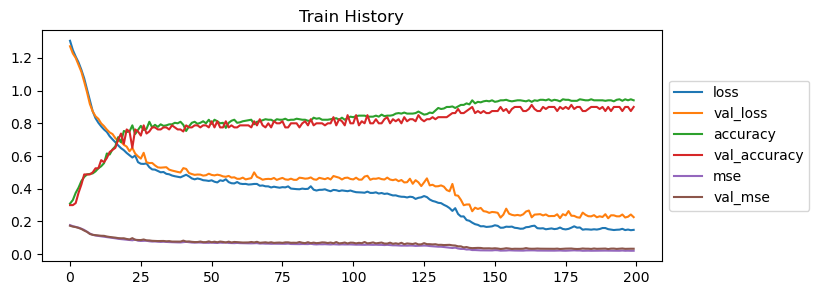

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))

plt.title('Train History')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')   # 'val_loss' 학습 안 된 데이터
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')  # 'val_accuracy' 학습 안 된 데이터
plt.plot(hist.history['mse'], label='mse')
plt.plot(hist.history['val_mse'], label='val_mse')



#plt.legend(fontsize='x-small')  # 범례 글자 크기 줄이기 또는

# plt.legend(fontsize=7) # 범례 글자 크기 줄이기

# plt.legend(loc='upper right') # 범례 위치 조절 방법 또는

# plt.legend(loc=1)  # 범례 위치 조절 방법 same as above 또는 

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    # 범례 위치 조절 방법
# =>  범례를 그래프의 오른쪽 중앙에 위치하되, y 축은 중앙에 위치하도록 설정하는 것
#bbox_to_anchor 인자는 범례 박스가 위치할 좌표를 지정. 
#(1, 0.5)은 그래프의 오른쪽 중앙을 의미. 
#이 경우 범례 박스는 그래프 바깥에 위치하게 됨

# plt.legend(loc='upper right', fontsize=6)  => 범례 글자 조절 +범례 위치 지정

plt.show()

```
범례 위치 조절시

plt.legend(loc=5)에 들어가는 숫자는 정해져 있음

 범례의 위치를 지정하는 데 사용되며, 다음과 같은 값들만 가질 수 있음[숫자나 문자 중 선택]

'best' (0): 가능한 최적의 위치 (기본값)
'upper right' (1)
'upper left' (2)
'lower left' (3)
'lower right' (4)
'right' (5)
'center left' (6)
'center right' (7)
'lower center' (8)
'upper center' (9)
'center'(10)

예를 들어, plt.legend(loc=5)는 범례를 그래프의 오른쪽에 배치하라는 의미. 이 외의 숫자를 사용하면 에러가 발생.

참고로, 문자열을 사용하여 위치를 지정하는 것이 코드를 읽고 이해하기 더 쉬움. 예: plt.legend(loc='right')
```

```
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 에서

loc 매개변수를 사용하여 범례의 위치를 지정할 수 있음. 
loc 매개변수에 사용 가능한 값을 문자열로 지정할 수 있으며, 각 문자열은 다른 범례 위치를 의미


'best' (기본값): 최적의 위치를 자동으로 선택.
'upper right': 오른쪽 상단.
'upper left': 왼쪽 상단.
'lower right': 오른쪽 하단.
'lower left': 왼쪽 하단.
'right': 오른쪽 중앙.
'center left': 왼쪽 중앙.
'upper center': 상단 중앙.
'lower center': 하단 중앙.
'center': 중앙.


위와 같은 문자열을 loc에 전달하여 범례의 위치를 설정할 수 있음. 
그러나 'center left'와 같이 세부 위치를 조정하려면 bbox_to_anchor 매개변수를 사용해야 함. 
이를 사용하여 범례를 그래프의 특정 위치로 이동시킬 수 있음. 


bbox_to_anchor는 (x, y) 형식의 튜플로 좌표를 받으며, (0, 0)은 그래프의 왼쪽 하단을 나타내고 
(1, 1)은 그래프의 오른쪽 상단을 나타냄.

따라서 plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))는 범례를 그래프의 오른쪽 중앙에 위치하되, 
y 축은 중앙에 위치하도록 설정하는 것입니다. 이를 통해 범례의 위치를 상세하게 조정할 수 있음.


plt.legend() 함수에서 bbox_to_anchor 매개변수의 좌표 값은 일반적으로 (x, y) 형식으로 사용됨. 
이 좌표 값은 상대적인 위치를 나타내며, (0, 0)은 그래프의 왼쪽 하단을, (1, 1)은 그래프의 오른쪽 상단을 나타냄. 
이 좌표 값은 0에서 1 사이의 값을 가질 수 있으며, 이 범위 내에서 원하는 위치를 지정할 수 있음.

따라서 bbox_to_anchor=(1, 0.5)은 x 좌표가 그래프의 오른쪽 끝에 위치하고, y 좌표가 그래프의 세로 중앙에 위치함을 의미. bbox_to_anchor 좌표에는 일반적으로 다음과 같은 값이 사용됨

(0, 0): 그래프의 왼쪽 하단.
(1, 0): 그래프의 오른쪽 하단.
(0, 1): 그래프의 왼쪽 상단.
(1, 1): 그래프의 오른쪽 상단.
(0.5, 0.5): 그래프의 중앙.


다른 중간값은 더 정밀한 위치를 지정하는 데 사용할 수 있음. 
이 좌표 값은 그래프의 크기와 관련이 있으므로 그래프의 크기가 변경되면 위치도 조정해야 할 수 있음.



plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    # 범례 위치 조절 방법
# =>  범례를 그래프의 오른쪽 중앙에 위치하되, y 축은 중앙에 위치하도록 설정하는 것


```

In [94]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.2264 - accuracy: 0.9000 - mse: 0.0334


[0.22644278407096863, 0.8999999761581421, 0.03335205838084221]

In [96]:
_pred = model.predict(X)  # _pred 값은 softmax가 결정해 확률로 리턴
_pred

13/13 [==============================] - 0s 1ms/step


array([[9.5646811e-01, 4.0501482e-09, 8.1627979e-04, 4.2715598e-02],
       [2.0033764e-03, 1.4004431e-04, 9.9785632e-01, 1.5696197e-07],
       [3.4770460e-03, 1.0992687e-05, 9.9651116e-01, 7.5791399e-07],
       ...,
       [1.5156424e-05, 9.9998462e-01, 2.3826487e-07, 2.6001301e-13],
       [6.7693365e-01, 2.4192640e-01, 8.1137560e-02, 2.4248050e-06],
       [1.2575889e-08, 1.0000000e+00, 6.4487079e-12, 5.4801846e-20]],
      dtype=float32)

In [98]:
_pred[:5]

array([[9.5646811e-01, 4.0501482e-09, 8.1627979e-04, 4.2715598e-02],
       [2.0033764e-03, 1.4004431e-04, 9.9785632e-01, 1.5696197e-07],
       [3.4770460e-03, 1.0992687e-05, 9.9651116e-01, 7.5791399e-07],
       [9.7048587e-01, 2.0853075e-05, 2.8475337e-02, 1.0179040e-03],
       [1.9864566e-03, 2.3129495e-04, 9.9778205e-01, 1.3968891e-07]],
      dtype=float32)

In [99]:
pred = _pred.argmax(axis=1) # axis=1는 열을 가리키나 열 중 최고
pred[:5]   

# 위의 _pred[:5]와 비교해서 보자면,
# [9.5646811e-01, 4.0501482e-09, 8.1627979e-04, 4.2715598e-02] => 이게 0 그룹임
# [2.0033764e-03, 1.4004431e-04, 9.9785632e-01, 1.5696197e-07] => 이건 2 그룹임

array([0, 2, 2, 0, 2], dtype=int64)

In [114]:
from sklearn.preprocessing import LabelEncoder
# 원본 데이터가 숫자로 전달되고 있어서 LabelEncoder를 사용하여 Species 열의 문자열 레이블을 숫자로 변환해야 시각화 가능
# 안 그럼 오류남

le = LabelEncoder() 
y_encoded = le.fit_transform(y)  # 문자열을 숫자로 변환

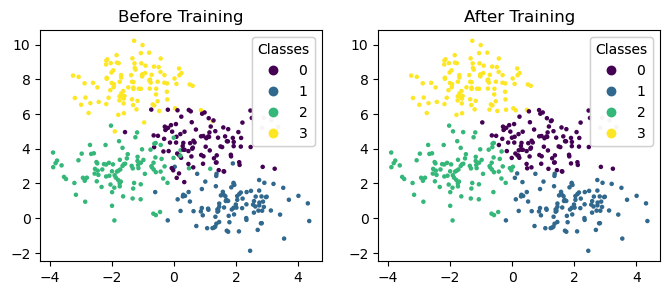

In [124]:
# 실제 분류와 모델이 추정한 분류의 비교
# subplot() 사용하기


fig = plt.figure(figsize=(8, 3))  # 새로운 그림(Figure) 객체를 생성. 이 함수는 기본적으로 크기가 (6.4, 4.8) 인치인 그림을 생성
# 상하좌우로 차트를 나눠서 그릴 수 있는 것 중 121, 122는 상하좌우로 나누는 것.
# Figure 위에 subplot이나 차트가 그려질 때 해당 Figure의 크기 내에서 자동으로 위치가 조정
# subplot은 figure 안에 들어가는 서브 플롯(subplot)을 의미


# 학습 전 데이터

ax1 = fig.add_subplot(121)  # 한 행을 2개로 나눠서 첫 번째 차트를 그릴 수 있는 axis 객체
scatter1 = ax1.scatter(X[:,0], X[:,1], c=y_encoded, s=5)
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes", loc="upper right")
ax1.add_artist(legend1)  # legend를 subplot에 추가
ax1.set_title("Before Training")  # 첫 번째 차트에 제목 추가


# 학습 후 데이터

ax2 = fig.add_subplot(122)  # 한 행을 2개로 나눠서 두 번째 차트를 그릴 수 있는 axis 객체
scatter2 = ax2.scatter(X[:,0], X[:,1], c=pred, s=5)
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes", loc="upper right")
ax2.add_artist(legend2)  #  범례(legend2)를 서브 플롯 ax2에 직접 추가하는 것을 의미. 범례가 서브 플롯 내에서 독립적으로 위치
ax2.set_title("After Training")

plt.show()


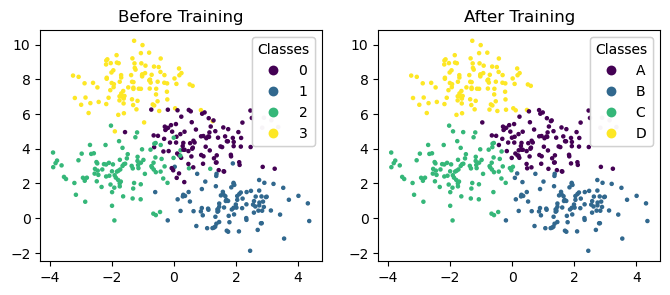

In [131]:
# 위 차트에서 범례명을 변경해서 나타내기

fig = plt.figure(figsize=(8, 3))

# 학습 전 데이터
ax1 = fig.add_subplot(121)
scatter1 = ax1.scatter(X[:,0], X[:,1], c=y_encoded, s=5)
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes", loc="upper right")
ax1.add_artist(legend1)
ax1.set_title("Before Training")

# 학습 후 데이터
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(X[:,0], X[:,1], c=pred, s=5)
handles, _ = scatter2.legend_elements()
labels = ["A", "B", "C", "D"]
legend2 = ax2.legend(handles, labels, title="Classes", loc="upper right")
ax2.add_artist(legend2)
ax2.set_title("After Training")

plt.show()


```
"A", "B", "C", "D"가 모두 두 번째 차트의 범례 항목으로 표시될 때
legend_elements()를 사용하면, 범례 항목의 숫자와 순서가 자동으로 설정되므로 


legend2 = ax2.legend(*scatter2.legend_elements(), labels=["A", "B", "C", "D"], title="Classes", loc="upper right")
이렇게 하면 A만 차트에 나옴

"A"만 나오는 것은 이 함수의 작동 방식 때문임.

만약 "A", "B", "C", "D"를 순서대로 나타내려면 아래와 같이 직접 범례 항목과 레이블을 매핑하는 방법을 사용할 수 있음:
    
    
legend2 = ax2.legend(labels=["A", "B", "C", "D"], title="Classes", loc="upper right")
```

In [217]:
text = {0:'A',1:'B',2:'C',3:'D'}
# 리스트 컴프리헨션(List comprehension) 사용
legend_text = [text[t] for t in pred] 

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['A', 'C', 'C', 'A', 'C', 'D', 'B', 'C', 'C', 'B', 'D', 'B', 'A', 'C', 'C', 'B', 'C', 'B', 'A', 'C', 'C', 'C', 'D', 'A', 'A', 'D', 'D', 'B', 'A', 'B', 'A', 'A', 'C', 'D', 'C', 'D', 'B', 'A', 'B', 'A', 'C', 'D', 'B', 'D', 'B', 'D', 'B', 'B', 'B', 'D', 'D', 'D', 'C', 'D', 'D', 'C', 'C', 'B', 'C', 'C', 'B', 'B', 'B', 'B', 'A', 'C', 'B', 'C', 'A', 'A', 'C', 'A', 'C', 'D', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'A', 'B', 'D', 'A', 'C', 'C', 'A', 'C', 'B', 'C', 'B', 'A', 'C', 'C', 'D', 'A', 'B', 'B', 'B', 'D', 'B', 'A', 'A', 'C', 'D', 'A', 'D', 'B', 'C', 'C', 'C', 'A', 'C', 'D', 'B', 'D', 'C', 'D', 'D', 'C', 'A', 'B', 'D', 'A', 'D', 'B', 'B', 'B', 'A', 'D', 'D', 'D', 'C', 'A', 'C', 'D', 'A', 'D', 'C', 'C', 'C', 'C', 'D', 'C', 'B', 'A', 'C', 'B', 'C', 'B', 'A', 'B', 'A', 'D', 'C', 'B', 'C', 'C', 'C', 'A', 'C', 'D', 'C', 'C', 'D', 'B', 'B', 'C', 'D', 'D', 'D', 'D', 'B', 'B', 'B', 'A', 'C', 'A', 'D', 'A', 'D', 'C', 'A', 'D', 'C', 'D', 'B', 'A', 'D', 'A', 'A', 'D', 'C', 'D', 'D', 'D', 'B', 'B', 'A', 'A', 'C', 'B', 'B', 'D', 'A', 'C', 'D', 'A', 'D', 'A', 'A', 'B', 'B', 'D', 'B', 'A', 'D', 'B', 'D', 'C', 'A', 'D', 'C', 'A', 'C', 'B', 'D', 'A', 'D', 'A', 'C', 'A', 'A', 'D', 'B', 'A', 'B', 'A', 'C', 'B', 'A', 'A', 'D', 'B', 'A', 'D', 'A', 'B', 'C', 'C', 'B', 'C', 'A', 'D', 'A', 'A', 'A', 'B', 'D', 'A', 'C', 'C', 'C', 'D', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'D', 'C', 'B', 'D', 'B', 'B', 'B', 'D', 'B', 'B', 'D', 'D', 'D', 'B', 'A', 'B', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'A', 'D', 'B', 'B', 'A', 'D', 'D', 'B', 'B', 'A', 'D', 'D', 'B', 'A', 'B', 'D', 'C', 'C', 'B', 'C', 'D', 'C', 'C', 'D', 'C', 'D', 'A', 'C', 'D', 'B', 'D', 'A', 'C', 'A', 'C', 'B', 'A', 'B', 'D', 'B', 'B', 'B', 'B', 'D', 'B', 'C', 'B', 'C', 'B', 'A', 'D', 'A', 'B', 'B', 'A', 'C', 'C', 'D', 'D', 'D', 'C', 'A', 'B', 'A', 'C', 'B', 'C', 'D', 'C', 'A', 'A', 'C', 'D', 'A', 'D', 'D', 'C', 'D', 'C', 'D', 'A', 'A', 'A', 'A', 'D', 'D', 'D', 'D', 'C', 'D', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'B']

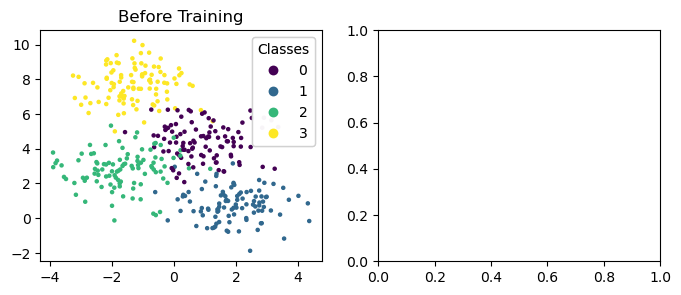

In [219]:
# 위 차트에서 범례명을 변경해서 나타내기

fig = plt.figure(figsize=(8, 3))

# 학습 전 데이터
ax1 = fig.add_subplot(121)
scatter1 = ax1.scatter(X[:,0], X[:,1], c=y_encoded, s=5)
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes", loc="upper right")
ax1.add_artist(legend1)
ax1.set_title("Before Training")

# 학습 후 데이터
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(X[:,0], X[:,1], c=legend_text, s=5)
legend2 = ax1.legend(*scatter1.legend_elements(), title="Classes", loc="upper right")
ax2.add_artist(legend2)
ax2.set_title("After Training")

plt.show()  # 오류남

In [ ]:
# 위 문제 강사님 버전

# 함수형 API를 사용하여 다중분류 시스템을 작성해보세요

In [1]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=400, n_features=2, centers=4, random_state=0)
X.shape, y.shape

((400, 2), (400,))

### 위의 y에 저장된 데이터는 범주형이므로 One-Hot-Encoding 필요
- pd.get_dummies(y)

In [2]:
import pandas as pd
import numpy as np

np.unique(y)    # array([0, 1, 2, 3])

y_ohe_df = pd.get_dummies(y)
y_ohe_df

,0,1,2,3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
395,1,0,0,0
396,1,0,0,0
397,0,1,0,0
398,0,0,1,0


### 학습용/검증용 데이터 분리

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y_ohe_df, test_size=0.2, random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320, 4), (80, 4))

In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, Input

in_tensor = Input(shape=(2,) )
hidden1 = Dense(128, activation='relu')(in_tensor)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)
hidden4 = Dense(16, activation='relu')(hidden3)
hidden5 = Dense(8, activation='relu')(hidden4)
out_tensor = Dense(4, activation='softmax')(hidden5)

type(out_tensor)    # keras.src.engine.keras_tensor.KerasTensor
model = Model(in_tensor, out_tensor)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 4)                 36    

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                                        metrics=['mse','accuracy'])

In [7]:
hist = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

In [8]:
hist.history.keys()

dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy'])

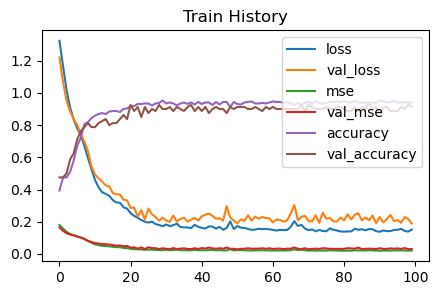

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.title('Train History')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['mse'], label='mse')
plt.plot(hist.history['val_mse'], label='val_mse')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [10]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.1893 - mse: 0.0303 - accuracy: 0.9125


[0.18927635252475739, 0.03034103848040104, 0.9125000238418579]

In [11]:
_pred = model.predict(X)
pred = _pred.argmax(axis=1)
pred[:5]

13/13 [==============================] - 0s 2ms/step


array([0, 2, 2, 0, 2], dtype=int64)

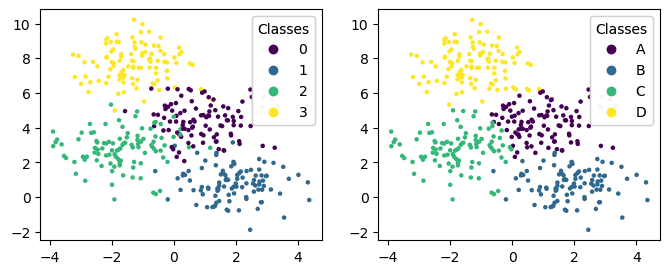

In [12]:
plt.figure(figsize=(8,3))
ax = plt.subplot(121)
scatter1 = ax.scatter(X[:,0], X[:,1], c=y, s=5)
legend1 = ax.legend(*scatter1.legend_elements(), title='Classes')
ax.add_artist(legend1)

ax2 = plt.subplot(122)
scatter2 = ax2.scatter(X[:,0], X[:,1], c=pred, s=5)
legend2 = ax2.legend(*scatter2.legend_elements(), title='Classes')
t_list = legend2.get_texts()
t_list[0].set_text('A')
t_list[1].set_text('B')
t_list[2].set_text('C')
t_list[3].set_text('D')
ax2.add_artist(legend2)

plt.show()

In [ ]:
# 감정 분석은 함수형으로만 가능

## numpy.argmax(), argsort()
- arr.argmax(axis=1) :배열에서 가장 큰 원소의 인덱스 리턴
- arr.argsort() : 배열에서 원소들을 오름차순 정렬하고 그 인덱스 리턴
- 내림차순 정렬시 : (-arr).argsort()

In [190]:
import numpy as np
# 임의의 정수 5개를 구하여 최대값의 인덱스, 최소값의 인덱스를 구해보세요.
# 오름차순과 내림차순으로 값을 정렬하여 표시해보세요


# 내 버전(나는 2차원으로 했으나 강사님은 1차원으로 하심)

arr = np.random.randint(0,100,5)
arr   # 1차원 배열   

array([21, 95, 94, 93, 17])

In [191]:
arr = np.random.randint(0,100,size=(1, 5))
arr   # 2차원 배열 

array([[66, 77, 84, 50, 91]])

In [201]:
# 최대값의 인덱스
max = arr.argmax(axis=1)
max

array([4], dtype=int64)

In [206]:
arr[0][max]

array([91])

In [207]:
# 최소값의 인덱스
min = arr.argmin(axis=1)
min

array([3], dtype=int64)

In [208]:
arr[0][min]

array([50])

In [213]:
# 오름차순으로 정렬(인덱스로 정렬)
asce_sort = arr.argsort() 
asce_sort

array([[3, 0, 1, 2, 4]], dtype=int64)

In [214]:
# 오름차순으로 정렬(인덱스로 정렬)
arr[0][asce_sort] 

array([[50, 66, 77, 84, 91]])

In [215]:
# 내림차순으로 정렬(값으로 정렬)
desc_sort = (-arr).argsort() 
desc_sort

array([[4, 2, 1, 0, 3]], dtype=int64)

In [216]:
# 내림차순으로 정렬(값으로 정렬)
arr[0][desc_sort] 

array([[91, 84, 77, 66, 50]])

In [ ]:
# 임의의 정수 5개를 구하여 최대값의 인덱스, 최소값의 인덱스를 구해보세요.
# 내림차순으로 값을 정렬하여 표시해보세요

# 강사님 버전

In [13]:
# 임의의 정수 5개를 구하여 최대값의 인덱스, 최소값의 인덱스를 구해보세요.
# 내림차순으로 값을 정렬하여 표시해보세요.
import numpy as np
arr = np.random.randint(1,100, 5)
arr

array([30, 64, 93, 96, 29])

In [14]:
max = arr[arr.argmax()]
print(f'최대값={max}')

최대값=96


In [15]:
# 내림차순 정렬된 인덱스 구하기
desc_index = (-arr).argsort()   # 최대값에 -를 붙이면 최소값이 된다
desc_index

array([3, 2, 1, 0, 4], dtype=int64)

In [16]:
# 내림차순 정렬결과 출력
arr[desc_index]

array([96, 93, 64, 30, 29])

In [17]:
# 최소값 구하기
arr[desc_index[-1]]

29

### 배열에서 중복되지 않도록 값 추출하기

In [18]:
arr = np.random.randint(1,11,7)
arr

array([ 2,  5,  4, 10,  1,  4,  4])

In [19]:
# 중복을 제외하고 유일한 값의 수는 몇개인가?
np.unique(arr)         # array([2, 3, 4, 6, 9])
len( np.unique(arr))   # 5

5

## tf.keras.layers.Embedding
- 미리 정해진 크기의 양의 정수(인덱스)를 입력 받아서 고정 크기의 벡터 생성
- 생성된 벡터의 성분들은 가중치가 결합되어 학습된다
- https://keras.io/api/layers/core_layers/embedding/

In [20]:
model = Sequential()
model.add( Embedding(1000, 20, input_length=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 20)             20000     
                                                                 
Total params: 20000 (78.12 KB)
Trainable params: 20000 (78.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 9월 6일

## 학습용 데이터
- 2개의 입력 텐서에 전달될 2개의 입력 데이터 준비
- Embedding 레이어에 전달될 데이터는 양의 정수이어야 한다
- Embedding 레이어의 input_dim은 입력 데이터의 개수보다 1 크게 설정
- 여기서는 x1, x2 입력 데이터와 그 점의 거리를 y에 저장하여 학습 데이터로 사용한다

```
영화 평점 분석을 이용한 추천 시스템 원리

- 이용자, 영화, 평점
- 이용자를 벡터로 표현(이용자 인덱스 -> 벡터)
- 영화를 벡터로 표현(영화 인덱스 -> 벡터)
- 이용자 벡터 + 영화 벡터 = 평점
- 평점 산출을 위해서 이용자 벡터의 가중치와 영화 벡터의 가중치가 학습이 되어 평점을 추정 완성함
- 손실함수가 계산한 경사하강법에 의해 조작이 다 되고 나면 평점 추정 산출을 위해 이용자 벡터는 가중치 조작을 통해 이용자의 영화 취향이 기록되고 영화 벡터는 가중치 조작을 통해 영화 장르 취향이 표현 내장된 벡터가 기록됨)
평점 맞추기이므로 회귀 이용


- '이용자 벡터 + 영화 벡터'를 학습시켜아 하는데 그게 가능한 레이어가 Embedding 레이어임(양의 정수를 벡터로 변환시켜 줌))
- 2개의 Input(이용자번호, 영화번호)을 가진 신경망 생성
- 2개의 Input은 각각의 Embedding 레이어로 전달
- 벡터 두 개를 Dot(내적)이나, Concatenate()으로 결합
- 출력 레이어(Dense)를 마지막에 결합 
```

In [23]:
import numpy as np

x1 = np. random.randint(0, 100, 1000)  # 이용자에 해당  1000명내에서 100을 추출하므로 중복 많음
x2 = np. random.randint(0, 100, 1000)  # 영화에 해당

y = np.sqrt(x1**2+x2**2)   # 평점에 해당(루트 씌운 것)=> x1과 x2 사이의 거리가 됨. 결합을 위한 식 세움(누가 세우나......)
# 덧셈과 곱셈은 선형 결과만 나옴

x1.shape, x2.shape, y.shape

((1000,), (1000,), (1000,))

# 함수형 입력 텐서 2개와 2개의 Embedding 레이어를 사용하는 신경망 생성

In [49]:
# 신경망 생성

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, Input, Flatten
from tensorflow.keras.layers import Dot

input1 = Input(shape=(1,)) 
embd1 = Embedding(1000+1, 20)(input1)  # 한사람을 숫자 20개로 영화 취향을 표현하겠단 의미
flat1 = Flatten()(embd1)    # 1차원으로 변경(결합한 뒤 사용해야 하므로)


input2 = Input(shape=(1,)) 
embd2 = Embedding(1000+1, 20)(input2)  
flat2 = Flatten()(embd2)

# 덧셈과 곱셈은 선형 결과만 나옴
dot = Dot(axes=1)([flat1, flat2])     # 벡터의 내적 연산
# 1차원 벡터를 Dot를 이용해 내적하면 스칼라값을 생성(Dot는 이용자와 영화를 결합해 숫자 하나를 만들므로 dot는 평점에 해당하게 됨)

# dot가 실제 평점과 얼마나 다른지 확인이 되려면 최종 출력이 되어야 함(신경망에 값이 나가게 해야 하므로 Model 사용)
model = Model([input1, input2], dot)  # [input1, input2]이 학습됨(오차를 받아서 가중치를 학습)

```
# 뉴런이 명시적으로 쓰인 게 없어 가중치 없 48:00 영상 다시 듣기
#embedding_3 (Embedding)     (None, 1, 20)                20020     ['input_4[0][0]']             
                                                                                                  
 embedding_4 (Embedding)     (None, 1, 20)                20020     ['input_5[0][0]']   
# 벡터에 가중치들이 설정돼 있음(20개의 숫자가 1001[1000+1]로 두었기 때문에  20020 가중치가 만들어짐 => 이용자 벡터)
```

In [50]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 input_13 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_11 (Embedding)    (None, 1, 20)                20020     ['input_12[0][0]']            
                                                                                                  
 embedding_12 (Embedding)    (None, 1, 20)                20020     ['input_13[0][0]']            
                                                                                            

In [51]:
model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])

In [52]:
# 학습을 위해 1차원 데이터를 2차원으로 바꾸기
x1.shape

(1000,)

In [53]:
# 여기서 그냥  epochs=100을 epochs=200으로 수정해서 진행을 하면 기존 학습된 것에서 추가 200을  epochs 하게 되는 거라서 
# 아예 처음부터 생성망부터 다시 돌려서 학습해야함
hist = model.fit([x1.reshape(-1,1), x2.reshape(-1,1)], y, batch_size=10, epochs=300, verbose=1, validation_split=0.2)

Epoch 1/300
80/80 [==============================] - 1s 4ms/step - loss: 6430.0093 - mae: 74.9103 - mse: 6430.0093 - val_loss: 6916.3369 - val_mae: 78.9988 - val_mse: 6916.3369
Epoch 2/300
80/80 [==============================] - 0s 2ms/step - loss: 6429.3086 - mae: 74.9060 - mse: 6429.3086 - val_loss: 6916.1426 - val_mae: 78.9976 - val_mse: 6916.1426
Epoch 3/300
80/80 [==============================] - 0s 2ms/step - loss: 6428.0039 - mae: 74.8979 - mse: 6428.0039 - val_loss: 6915.4146 - val_mae: 78.9932 - val_mse: 6915.4146
Epoch 4/300
80/80 [==============================] - 0s 2ms/step - loss: 6425.1851 - mae: 74.8803 - mse: 6425.1851 - val_loss: 6913.3105 - val_mae: 78.9802 - val_mse: 6913.3105
Epoch 5/300
80/80 [==============================] - 0s 2ms/step - loss: 6419.5952 - mae: 74.8453 - mse: 6419.5952 - val_loss: 6908.6802 - val_mae: 78.9513 - val_mse: 6908.6802
Epoch 6/300
80/80 [==============================] - 0s 2ms/step - loss: 6409.8086 - mae: 74.7835 - mse: 6409.8086 

80/80 [==============================] - 0s 2ms/step - loss: 283.3857 - mae: 12.6259 - mse: 283.3857 - val_loss: 604.0566 - val_mae: 18.1389 - val_mse: 604.0566
Epoch 94/300
80/80 [==============================] - 0s 2ms/step - loss: 271.5943 - mae: 12.3434 - mse: 271.5943 - val_loss: 584.0895 - val_mae: 17.8017 - val_mse: 584.0895
Epoch 95/300
80/80 [==============================] - 0s 2ms/step - loss: 260.5060 - mae: 12.0727 - mse: 260.5060 - val_loss: 566.0090 - val_mae: 17.4902 - val_mse: 566.0090
Epoch 96/300
80/80 [==============================] - 0s 2ms/step - loss: 250.2222 - mae: 11.8158 - mse: 250.2222 - val_loss: 547.5634 - val_mae: 17.1936 - val_mse: 547.5634
Epoch 97/300
80/80 [==============================] - 0s 2ms/step - loss: 240.3359 - mae: 11.5589 - mse: 240.3359 - val_loss: 530.9607 - val_mae: 16.9124 - val_mse: 530.9607
Epoch 98/300
80/80 [==============================] - 0s 2ms/step - loss: 231.0498 - mae: 11.3211 - mse: 231.0498 - val_loss: 514.2474 - val_ma

Epoch 188/300
80/80 [==============================] - 0s 2ms/step - loss: 65.5494 - mae: 5.7657 - mse: 65.5494 - val_loss: 115.5718 - val_mae: 8.2676 - val_mse: 115.5718
Epoch 189/300
80/80 [==============================] - 0s 2ms/step - loss: 65.2571 - mae: 5.7461 - mse: 65.2571 - val_loss: 115.3320 - val_mae: 8.2544 - val_mse: 115.3320
Epoch 190/300
80/80 [==============================] - 0s 2ms/step - loss: 65.0716 - mae: 5.7367 - mse: 65.0716 - val_loss: 114.7666 - val_mae: 8.2414 - val_mse: 114.7666
Epoch 191/300
80/80 [==============================] - 0s 2ms/step - loss: 64.8155 - mae: 5.7288 - mse: 64.8155 - val_loss: 114.9492 - val_mae: 8.2380 - val_mse: 114.9492
Epoch 192/300
80/80 [==============================] - 0s 2ms/step - loss: 64.5750 - mae: 5.7188 - mse: 64.5750 - val_loss: 114.3549 - val_mae: 8.2214 - val_mse: 114.3549
Epoch 193/300
80/80 [==============================] - 0s 2ms/step - loss: 64.2722 - mae: 5.6966 - mse: 64.2722 - val_loss: 113.8697 - val_mae: 8

Epoch 236/300
80/80 [==============================] - 0s 2ms/step - loss: 52.9818 - mae: 5.1103 - mse: 52.9818 - val_loss: 112.2192 - val_mae: 8.0487 - val_mse: 112.2192
Epoch 237/300
80/80 [==============================] - 0s 2ms/step - loss: 52.6695 - mae: 5.1001 - mse: 52.6695 - val_loss: 111.9214 - val_mae: 8.0262 - val_mse: 111.9214
Epoch 238/300
80/80 [==============================] - 0s 2ms/step - loss: 52.3458 - mae: 5.0806 - mse: 52.3458 - val_loss: 111.9751 - val_mae: 8.0242 - val_mse: 111.9751
Epoch 239/300
80/80 [==============================] - 0s 2ms/step - loss: 52.0849 - mae: 5.0673 - mse: 52.0849 - val_loss: 112.0009 - val_mae: 8.0249 - val_mse: 112.0009
Epoch 240/300
80/80 [==============================] - 0s 2ms/step - loss: 51.8288 - mae: 5.0554 - mse: 51.8288 - val_loss: 111.8946 - val_mae: 8.0212 - val_mse: 111.8946
Epoch 241/300
80/80 [==============================] - 0s 2ms/step - loss: 51.5378 - mae: 5.0439 - mse: 51.5378 - val_loss: 112.1591 - val_mae: 8

Epoch 284/300
80/80 [==============================] - 0s 2ms/step - loss: 37.6229 - mae: 4.1743 - mse: 37.6229 - val_loss: 114.0910 - val_mae: 8.0027 - val_mse: 114.0910
Epoch 285/300
80/80 [==============================] - 0s 2ms/step - loss: 37.2738 - mae: 4.1617 - mse: 37.2738 - val_loss: 114.2095 - val_mae: 8.0100 - val_mse: 114.2095
Epoch 286/300
80/80 [==============================] - 0s 2ms/step - loss: 36.9787 - mae: 4.1362 - mse: 36.9787 - val_loss: 113.8914 - val_mae: 7.9972 - val_mse: 113.8914
Epoch 287/300
80/80 [==============================] - 0s 2ms/step - loss: 36.6479 - mae: 4.1157 - mse: 36.6479 - val_loss: 114.2562 - val_mae: 8.0074 - val_mse: 114.2562
Epoch 288/300
80/80 [==============================] - 0s 2ms/step - loss: 36.3233 - mae: 4.0972 - mse: 36.3233 - val_loss: 114.3982 - val_mae: 8.0078 - val_mse: 114.3982
Epoch 289/300
80/80 [==============================] - 0s 2ms/step - loss: 35.9038 - mae: 4.0614 - mse: 35.9038 - val_loss: 114.2021 - val_mae: 7

In [54]:
hist.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

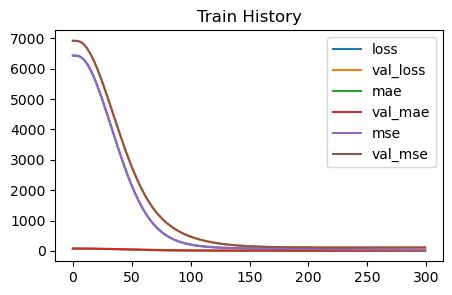

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.title('Train History')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['mae'], label='mae')
plt.plot(hist.history['val_mae'], label='val_mae')
plt.plot(hist.history['mse'], label='mse')
plt.plot(hist.history['val_mse'], label='val_mse')

plt.legend()
plt.show()

In [ ]:
# 여기까지 평점을 만드는 공식을 완성한 것(가중치 학습 완료)

In [56]:
# x1, x2 두 개니까 리스트로 줘야 함
model.evaluate([x1, x2], y)   #  y를 꼭 파라미터로 넣어줘야 함

32/32 [==============================] - 0s 2ms/step - loss: 47.6133 - mae: 4.5666 - mse: 47.6133


[47.61332321166992, 4.566604137420654, 47.61332321166992]

In [61]:
model.predict([x1[0].reshape(-1,1),x2[10].reshape(-1,1)])   # 첫번째 사람은 열번째 영화에 대해 어떻게 평가를 할까?

1/1 [==============================] - 0s 93ms/step


array([[98.68866]], dtype=float32)

In [63]:
np.sqrt(x1[0]**2+x2[10]**2)  # 실제값 103 // 모델이 추청한 평점이 98 [매우 흡사]

103.47946656221224

## Dot를 써서 식을 주지 않고 비선형으로 만들어서 하는 방법 => Concatenate() 을 이용
- 위 내용 Concatenate()  버전임
- 단순한 덧셈이나 곱셈만 되어 선형 결과만 가능한 Dot보다 정확함

In [64]:
import numpy as np

x1 = np. random.randint(0, 100, 1000)  # 이용자에 해당 1000명내에서 100을 추출하므로 중복 많음
x2 = np. random.randint(0, 100, 1000)  # 영화에 해당

y = np.sqrt(x1**2+x2**2)   # 평점에 해당(루트 씌운 것)=> x1과 x2 사이의 거리가 됨. 결합을 위한 식 세움(누가 세우나......)
# 덧셈과 곱셈은 선형 결과만 나옴

x1.shape, x2.shape, y.shape

((1000,), (1000,), (1000,))

```
여기서 np.random.randint(0, 100, 1000)는 0부터 99까지의 정수 중에서 랜덤하게 선택하여 총 1000개의 정수를 생성하는 코드. 
이 코드는 각각 사용자 ID(x1)와 영화 ID(x2)를 나타냄.

즉, 이것은 간단한 임의의 데이터셋을 생성하는 방법으로, 실제 문제 상황을 단순화한 것. 
실제로는 사용자 수와 영화 수가 훨씬 많을 수 있으며, 각 사용자가 평가한 영화와 그 평점도 다양할 것임.

이 코드에서 "1000명의 사용자 중에서 100명을 선택"하거나 "1000개의 영화 중에서 100개를 선택"하는 것이 아니라,
동일한 ID를 가진 사용자나 영화가 여러 번 등장할 수 있는 상황을 모사하기 위해 랜덤하게 선택된 ID를 생성하고 있음.

예를 들어 Netflix 추천 시스템 같은 경우에는 한 명의 사용자가 여러 개의 영화에 대해 평점을 매기고, 
한 편의 영화도 여러 명의 사용자로부터 평점을 받음.
이런 상황을 모델링하기 위해 랜덤한 정수를 생성하여 임시적인 '사용자'와 '영화' ID로 활용하는 것.

x1과 x2는 각각 이용자와 영화의 ID를 나타내는 임의의 데이터.

x1 = np.random.randint(0, 100, 1000): 이 코드는 0부터 99까지의 정수 중에서 랜덤하게 선택하여 총 1000개의 정수를 생성함. 
이렇게 생성된 숫자들은 "이용자 ID"를 의미하며, 같은 숫자가 여러 번 나타날 수 있음. 
즉, 한 사용자가 여러 영화에 평점을 매긴 상황을 모사.

x2 = np.random.randint(0, 100, 1000): 이 코드도 마찬가지로 0부터 99까지의 정수 중에서 랜덤하게 선택하여 총 1000개의 정수를 생성함. 
이 숫자들은 "영화 ID"를 의미하며, 같은 숫자가 여러 번 나타날 수 있음. 
즉, 한 영화가 여러 사용자로부터 평점을 받은 상황을 모사함.
이런 방식으로 생성된 데이터는 실제 추천 시스템에서 볼 수 있는 상황을 단순화한 것. 
실제로는 각 사용자와 각 영화에 대해 고유한 ID가 있으며, 사용자별로 평가한 영화와 그에 대한 평점 등이 데이터로 주어짐.

```

In [66]:
# 신경망 생성

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, Input, Flatten
from tensorflow.keras.layers import Dot, Concatenate

input1 = Input(shape=(1,)) 
embd1 = Embedding(1000+1, 20)(input1)  # 한사람을 숫자 20개로 영화 취향을 표현하겠단 의미
flat1 = Flatten()(embd1)    # 1차원으로 변경(결합한 뒤 사용해야 하므로)


input2 = Input(shape=(1,)) 
embd2 = Embedding(1000+1, 20)(input2)  
flat2 = Flatten()(embd2)

# 덧셈과 곱셈은 선형 결과만 나옴
#dot = Dot(axes=1)([flat1, flat2])     # 벡터의 내적 연산
# 1차원 벡터를 Dot를 이용해 내적하면 스칼라값을 생성(Dot는 이용자와 영화를 결합해 숫자 하나를 만들므로 dot는 평점에 해당하게 됨)

# Dot처럼 단순한 덧셈이나 곱셈이 아닌 결합을 하는 방법 => 비선형 가능
concat = Concatenate()([flat1, flat2])  # 리턴된 Tensor를 한 개의 숫자로.....
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)
out_tensor = Dense(1)(dense3)

model = Model([input1, input2], out_tensor)  # [input1, input2]이 학습됨(오차를 받아서 가중치를 학습)

In [67]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 input_17 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_15 (Embedding)    (None, 1, 20)                20020     ['input_16[0][0]']            
                                                                                                  
 embedding_16 (Embedding)    (None, 1, 20)                20020     ['input_17[0][0]']            
                                                                                            

In [68]:
# 여기서 손실함수는 mse인 이유 동영상 확인 필요

model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])

In [69]:
# 학습을 위해 1차원 데이터를 2차원으로 바꾸기
x1.shape

(1000,)

In [70]:
# 여기서 그냥  epochs=100을 epochs=200으로 수정해서 진행을 하면 기존 학습된 것에서 추가 200을  epochs 하게 되는 거라서 
# 아예 처음부터 생성망부터 다시 돌려서 학습해야함
hist = model.fit([x1.reshape(-1,1), x2.reshape(-1,1)], y, batch_size=10, epochs=300, verbose=1, validation_split=0.2)

Epoch 1/300
80/80 [==============================] - 2s 5ms/step - loss: 5318.2407 - mae: 66.4082 - mse: 5318.2407 - val_loss: 1398.8199 - val_mae: 31.4306 - val_mse: 1398.8199
Epoch 2/300
80/80 [==============================] - 0s 3ms/step - loss: 549.5891 - mae: 18.5486 - mse: 549.5891 - val_loss: 225.8582 - val_mae: 11.2640 - val_mse: 225.8582
Epoch 3/300
80/80 [==============================] - 0s 3ms/step - loss: 85.6790 - mae: 6.8624 - mse: 85.6790 - val_loss: 82.2600 - val_mae: 6.4820 - val_mse: 82.2600
Epoch 4/300
80/80 [==============================] - 0s 5ms/step - loss: 36.2586 - mae: 4.5703 - mse: 36.2586 - val_loss: 51.5320 - val_mae: 5.2363 - val_mse: 51.5320
Epoch 5/300
80/80 [==============================] - 0s 3ms/step - loss: 30.3155 - mae: 4.2347 - mse: 30.3155 - val_loss: 46.6760 - val_mae: 5.0928 - val_mse: 46.6760
Epoch 6/300
80/80 [==============================] - 0s 3ms/step - loss: 26.7901 - mae: 3.9203 - mse: 26.7901 - val_loss: 39.9955 - val_mae: 4.5707 -

Epoch 51/300
80/80 [==============================] - 0s 2ms/step - loss: 2.1532 - mae: 1.1249 - mse: 2.1532 - val_loss: 2.5578 - val_mae: 1.2637 - val_mse: 2.5578
Epoch 52/300
80/80 [==============================] - 0s 2ms/step - loss: 1.9871 - mae: 1.1027 - mse: 1.9871 - val_loss: 1.5061 - val_mae: 0.9421 - val_mse: 1.5061
Epoch 53/300
80/80 [==============================] - 0s 2ms/step - loss: 1.3925 - mae: 0.9114 - mse: 1.3925 - val_loss: 1.6618 - val_mae: 0.9750 - val_mse: 1.6618
Epoch 54/300
80/80 [==============================] - 0s 2ms/step - loss: 1.2309 - mae: 0.8352 - mse: 1.2309 - val_loss: 1.7223 - val_mae: 1.0559 - val_mse: 1.7223
Epoch 55/300
80/80 [==============================] - 0s 2ms/step - loss: 1.3574 - mae: 0.8816 - mse: 1.3574 - val_loss: 1.7942 - val_mae: 1.0440 - val_mse: 1.7942
Epoch 56/300
80/80 [==============================] - 0s 2ms/step - loss: 1.8211 - mae: 0.9757 - mse: 1.8211 - val_loss: 1.8272 - val_mae: 1.0257 - val_mse: 1.8272
Epoch 57/300
80/

Epoch 101/300
80/80 [==============================] - 0s 2ms/step - loss: 1.3660 - mae: 0.9206 - mse: 1.3660 - val_loss: 1.6112 - val_mae: 0.9279 - val_mse: 1.6112
Epoch 102/300
80/80 [==============================] - 0s 2ms/step - loss: 1.4106 - mae: 0.9064 - mse: 1.4106 - val_loss: 1.3454 - val_mae: 0.9015 - val_mse: 1.3454
Epoch 103/300
80/80 [==============================] - 0s 2ms/step - loss: 2.1914 - mae: 1.1387 - mse: 2.1914 - val_loss: 8.2939 - val_mae: 2.4120 - val_mse: 8.2939
Epoch 104/300
80/80 [==============================] - 0s 2ms/step - loss: 2.8292 - mae: 1.3008 - mse: 2.8292 - val_loss: 3.4182 - val_mae: 1.4041 - val_mse: 3.4182
Epoch 105/300
80/80 [==============================] - 0s 2ms/step - loss: 2.5043 - mae: 1.2542 - mse: 2.5043 - val_loss: 1.9383 - val_mae: 1.0673 - val_mse: 1.9383
Epoch 106/300
80/80 [==============================] - 0s 2ms/step - loss: 2.1519 - mae: 1.1422 - mse: 2.1519 - val_loss: 2.3354 - val_mae: 1.2114 - val_mse: 2.3354
Epoch 107/

Epoch 200/300
80/80 [==============================] - 0s 2ms/step - loss: 1.7097 - mae: 1.0305 - mse: 1.7097 - val_loss: 1.5171 - val_mae: 0.9327 - val_mse: 1.5171
Epoch 201/300
80/80 [==============================] - 0s 2ms/step - loss: 1.0104 - mae: 0.7870 - mse: 1.0104 - val_loss: 1.0120 - val_mae: 0.7460 - val_mse: 1.0120
Epoch 202/300
80/80 [==============================] - 0s 2ms/step - loss: 0.6411 - mae: 0.6191 - mse: 0.6411 - val_loss: 0.9539 - val_mae: 0.7061 - val_mse: 0.9539
Epoch 203/300
80/80 [==============================] - 0s 2ms/step - loss: 0.4143 - mae: 0.5131 - mse: 0.4143 - val_loss: 0.7085 - val_mae: 0.6143 - val_mse: 0.7085
Epoch 204/300
80/80 [==============================] - 0s 2ms/step - loss: 0.4771 - mae: 0.5453 - mse: 0.4771 - val_loss: 0.7001 - val_mae: 0.6568 - val_mse: 0.7001
Epoch 205/300
80/80 [==============================] - 0s 2ms/step - loss: 0.3805 - mae: 0.4831 - mse: 0.3805 - val_loss: 0.6957 - val_mae: 0.5973 - val_mse: 0.6957
Epoch 206/

Epoch 250/300
80/80 [==============================] - 0s 2ms/step - loss: 0.3039 - mae: 0.4276 - mse: 0.3039 - val_loss: 0.7114 - val_mae: 0.5842 - val_mse: 0.7114
Epoch 251/300
80/80 [==============================] - 0s 2ms/step - loss: 0.6807 - mae: 0.6406 - mse: 0.6807 - val_loss: 1.3789 - val_mae: 0.9263 - val_mse: 1.3789
Epoch 252/300
80/80 [==============================] - 0s 2ms/step - loss: 1.9843 - mae: 1.1064 - mse: 1.9843 - val_loss: 3.0441 - val_mae: 1.3649 - val_mse: 3.0441
Epoch 253/300
80/80 [==============================] - 0s 2ms/step - loss: 2.6074 - mae: 1.2607 - mse: 2.6074 - val_loss: 3.4630 - val_mae: 1.4610 - val_mse: 3.4630
Epoch 254/300
80/80 [==============================] - 0s 2ms/step - loss: 1.1306 - mae: 0.8084 - mse: 1.1306 - val_loss: 0.9961 - val_mae: 0.6985 - val_mse: 0.9961
Epoch 255/300
80/80 [==============================] - 0s 3ms/step - loss: 0.5316 - mae: 0.5752 - mse: 0.5316 - val_loss: 0.8719 - val_mae: 0.6740 - val_mse: 0.8719
Epoch 256/

Epoch 300/300
80/80 [==============================] - 0s 2ms/step - loss: 0.6793 - mae: 0.6503 - mse: 0.6793 - val_loss: 1.3002 - val_mae: 0.8517 - val_mse: 1.3002


In [71]:
hist.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

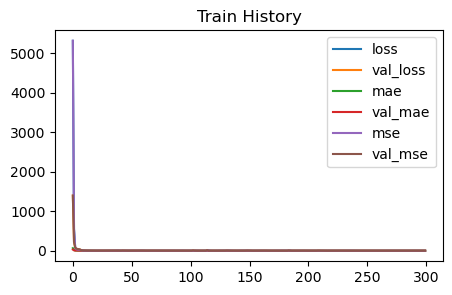

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.title('Train History')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['mae'], label='mae')
plt.plot(hist.history['val_mae'], label='val_mae')
plt.plot(hist.history['mse'], label='mse')
plt.plot(hist.history['val_mse'], label='val_mse')

plt.legend()
plt.show()

In [ ]:
# 여기까지 평점을 만드는 공식을 완성한 것(가중치 학습 완료)

In [73]:
# x1, x2 두 개니까 리스트로 줘야 함
model.evaluate([x1, x2], y)   #  y를 꼭 파라미터로 넣어줘야 함

32/32 [==============================] - 0s 2ms/step - loss: 0.7159 - mae: 0.6457 - mse: 0.7159


[0.7159112095832825, 0.6457011103630066, 0.7159112095832825]

In [74]:
# 모델이 예측한 평점 확인
model.predict([x1[0].reshape(-1,1),x2[10].reshape(-1,1)])   # 첫번째 사람은 열번째 영화에 대해 어떻게 평가를 할까?

1/1 [==============================] - 0s 115ms/step


array([[92.376396]], dtype=float32)

```
질문]
model.predict([x1[0].reshape(-1,1),x2[10].reshape(-1,1)])
=> 1차원을 2차원으로 바꾼 게 맞죠? 왜 그래야 할까요?

답변]
네, 맞습니다. reshape(-1, 1)을 사용하여 1차원 배열을 2차원으로 변경하고 있습니다.

이렇게 해야하는 이유는 대부분의 머신러닝과 딥러닝 라이브러리가 데이터를 2차원 형태로 기대하기 때문입니다.
예를 들어, scikit-learn의 경우 입력 데이터는 항상 2D 배열(즉, 행렬)이어야 합니다.

reshape(-1, 1) 코드에서 -1은 '나머지 차원'을 의미합니다. 즉 (n,) 형태의 배열을 (n, 1) 형태로 변환합니다.

특히 딥러닝 모델에서는 입력 데이터의 차원(dimension)과 모양(shape)에 대한 요구 사항이 엄격하므로 이런 변환이 필요합니다.

따라서 [x1[0].reshape(-1,1),x2[10].reshape(-1,1)] 코드는 x1[0]와 x2[10] 각각을 (n,)에서 (n, 1) 형태로 변경하고 있습니다.
여기서 n은 각 배열의 원소 개수입니다.
```

In [75]:
# 실제 데이터 평점 확인
np.sqrt(x1[0]**2+x2[10]**2)  # Concatenate()을 사용하니 모델이 학습한 값과 실제 값이 거의 일치하게 되었음

92.84934033152847

In [ ]:
# 문제)
# x1[0] : 이용자 번로로 간주
# x2 : 영화 번호로 간주
# x1[0] 이용자가 전체 영화 중에서 가장 좋아할 것으로 추정되는 영화 번호는?

In [79]:
# 내 버전

model.predict([x1[0].reshape(-1,1),x2[x2.argmax()].reshape(-1,1)])  # 이렇게 풀었으나 잘못되었음

1/1 [==============================] - 0s 26ms/step


array([[106.23266]], dtype=float32)

```
사용하신 model.predict([x1[0].reshape(-1,1),x2[x2.argmax()].reshape(-1,1)]) 코드는 
첫 번째 사용자(x1[0])가 x2 중에서 가장 큰 값을 가진 영화(x2[x2.argmax()])에 대한 평점을 예측하는 것입니다. 
그러나 이것은 첫 번째 사용자가 가장 좋아할 영화를 찾는 것과는 다릅니다.

첫 번째 사용자가 가장 좋아할 것으로 예상되는 영화를 찾으려면,
첫 번째 사용자와 모든 가능한 영화에 대한 평점을 예측하고, 그 중에서 가장 높은 평점을 가진 영화를 선택해야 합니다.

다음과 같이 코드를 작성해 볼 수 있습니다:


user_id = x1[0]
movie_ids = np.arange(1000)  # 가능한 모든 영화 id

# 첫 번째 사용자와 모든 가능한 영화에 대한 평점을 예측
user_vector = np.full((1000,), user_id)  # 동일한 user_id로 채워진 배열 생성
predictions = model.predict([user_vector.reshape(-1, 1), movie_ids.reshape(-1, 1)])


# 최고 점수의 인덱스(영화 ID) 찾기
favorite_movie_id = np.argmax(predictions)
print(favorite_movie_id)



위의 코드는 첫 번째 사용자와 각각의 영화 사이의 예상 평점을 계산하고, 
그 중에서 최대값을 갖는 인덱스(즉, "예상되는" 좋아하는 영화 ID)를 반환다.

np.arange(1000)는 가능한 모든 영화의 ID를 생성하는 것다.

그러나 만약 x2가 이미 가능한 모든 영화의 ID를 포함하고 있다면, 다시 생성할 필요는 없음. 
그런데 위에서 제공된 코드에서 x2는 0부터 100 사이의 랜덤 정수를 가지므로, 
이것은 특정 범위 내에서 임의로 선택된 "영화"를 나타내며, 반드시 모든 가능한 영화 ID를 포함하고 있는 것은 아님.

따라서 첫 번째 사용자에 대해 모든 영화에 대한 평점을 예측하려면, 가능한 모든 영화 ID에 대해 예측을 수행해야 함. 
이 때문에 np.arange(1000)으로 가능한 모든 영화 ID를 생성하는 것.

만약 실제 문제 상황에서 이미 갖고 있는 전체 영화 목록이 있다면, 그 목록을 사용하여 예측을 수행할 수 있음.

그러나 이렇게 계산된 결과도 완벽하게 신뢰하기 어려움. 
왜냐하면 우리가 생성한 데이터셋(y = sqrt(x1^2 + x2^2))과 신경망 구조(Embedding layers + Dense layers) 사이에 괴리가 있기 때문. 
이 데이터셋은 유효하지 않은 경우도 많음.
따라서 실제 문제 상황에서 이런 방식으로 접근하는 것보다 더 정교한 방법들이 필요.

```

In [81]:
user_id = x1[0]  # 첫번째 이용자를 아이디로 저장
movie_ids = np.arange(1000)  # 가능한 모든 영화 id

# 첫 번째 사용자와 모든 가능한 영화에 대한 평점을 예측
user_vector = np.full((1000,), user_id)  # 동일한 user_id로 채워진 배열 생성    
# x1[0] 한 사람을 1000으로 만듬(학습을 한대로 문제를 줘야 에러가 안 남)
predictions = model.predict([user_vector.reshape(-1, 1), movie_ids.reshape(-1, 1)]) # 이용자 입력, 영화 입력

# 최고 점수의 인덱스(영화 ID) 찾기
favorite_movie_id = np.argmax(predictions)  # 가장 높은 인덱스 번호 출력
print(favorite_movie_id)

32/32 [==============================] - 0s 1ms/step
99


In [82]:
# 첫 번째 사용자가 가장 좋아할 것으로 여겨지는 영화에 대한 평점 확인해보기
predict = model.predict([x1[0].reshape(-1,1), x2[favorite_movie_id].reshape(-1,1)])
predict

1/1 [==============================] - 0s 27ms/step


array([[37.673088]], dtype=float32)

In [95]:
# 첫번째 이용자가 평가한 100개의 영화 점수

# x1[0]은 첫 번째 사용자를 의미하고, 모든 영화에 대한 이 사용자의 평점을 예측하려면, 
# 이 사용자와 각 영화에 대해 모델의 predict 메서드를 호출해야 함
user_id = x1[0]
movie_ids = np.arange(1000)  # 가능한 모든 영화 id

# 첫 번째 사용자와 모든 가능한 영화에 대한 평점을 예측
user_vector = np.full((1000,), user_id)  # 동일한 user_id로 채워진 배열 생성
predictions = model.predict([user_vector.reshape(-1, 1), movie_ids.reshape(-1, 1)])

# 예상 평점 출력
print(predictions)

32/32 [==============================] - 0s 1ms/step
[[ 34.394413]
 [ 34.13202 ]
 [ 34.752537]
 [ 34.017525]
 [ 35.611084]
 [ 34.73719 ]
 [ 34.90173 ]
 [ 35.863705]
 [ 35.513046]
 [ 36.837048]
 [ 36.49064 ]
 [ 36.22035 ]
 [ 36.406487]
 [ 37.673088]
 [ 38.73209 ]
 [ 38.154026]
 [ 39.016903]
 [ 39.031193]
 [ 39.40739 ]
 [ 40.737514]
 [ 40.922405]
 [ 40.87866 ]
 [ 41.08736 ]
 [ 42.377308]
 [ 42.77294 ]
 [ 43.73711 ]
 [ 43.611515]
 [ 43.341103]
 [ 45.018253]
 [ 46.54369 ]
 [ 46.331394]
 [ 47.85776 ]
 [ 48.32072 ]
 [ 48.872547]
 [ 49.44309 ]
 [ 49.13824 ]
 [ 51.176064]
 [ 51.060314]
 [ 52.131954]
 [ 52.703934]
 [ 54.0082  ]
 [ 54.754562]
 [ 54.67442 ]
 [ 56.661488]
 [ 56.270912]
 [ 58.204556]
 [ 58.668064]
 [ 58.428844]
 [ 59.62373 ]
 [ 60.677235]
 [ 62.241512]
 [ 62.923817]
 [ 63.519344]
 [ 64.86428 ]
 [ 65.62535 ]
 [ 67.28375 ]
 [ 66.889595]
 [ 68.04195 ]
 [ 68.78677 ]
 [ 69.46471 ]
 [ 70.111   ]
 [ 70.41117 ]
 [ 71.28551 ]
 [ 72.97662 ]
 [ 71.54734 ]
 [ 75.78678 ]
 [ 75.314026]
 [ 75.835

# 학습된 모델을 파일에 저장하고 로드하기

In [124]:
# 학습된 모델을 파일에 저장
model.save('model_recommend_model.keras')

In [ ]:
# 파일 저장된 모델을 로드하는 방법

import tensorflow.keras
re_model = tensorflow.keras.model.load_model('model_recommend_model.keras')

# 실제 영화 평점 데이터를 이용한 추천시스템 

In [140]:
# 내 버전

import pandas as pd
df = pd.read_csv('https://cwisky.github.io/public/movie_ratings.csv')
df

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376


In [128]:
df.to_csv('data/deep_learning_movie', index=None)   # 인덱스를 아예 빼고서 저장한 경우 => 추후 인덱스 제외 처리 없이 읽어오면 됨
print('파일 생성 완료')

파일 생성 완료


In [102]:
df2 = pd.read_csv('data/deep_learning_movie')
df2

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376


In [ ]:
df.to_csv('data/deep_learning_movie')   # 데이터프레임에 있던 인덱스를 함께 저장한 경우 => 추후 인덱스 제외 처리 없이 읽어오면 됨
print('파일 생성 완료')

In [99]:
df2 = pd.read_csv('data/deep_learning_movie', index_col=0)  # 인덱스까지 저장되었을 때 인덱스 컬럼 제외하고 읽어오고 싶은 경우
df2

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376


In [142]:
df = df.drop('timestamp', axis=1)
df

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
1048570,7120,168,5.0
1048571,7120,253,4.0
1048572,7120,260,5.0
1048573,7120,261,4.0


In [154]:
unique_users = df['userId'].unique()
unique_movies = df['movieId'].unique()
print(unique_users)
print(unique_movies)


num_unique_users = len(unique_users)
num_unique_movies = len(unique_movies)

print(num_unique_users)  # 7120
print(num_unique_movies)    # 14026

[   1    2    3 ... 7118 7119 7120]
[     2     29     32 ...  32013 102596  65651]
7120
14026


In [155]:
# 또는
num_unique_users = df['userId'].nunique()
num_unique_movies = df['movieId'].nunique()
print(num_unique_users)  # 7120
print(num_unique_movies)  # 14026

7120
14026


```
신경망 모델은 일반적으로 숫자형 특성을 기대하기 때문에, 이들 ID 값이 범주형 변수로 해석되지 않도록 주의해야 합니다.

또한 추천 시스템에서 일반적으로 사용하는 방법 중 하나는 원-핫 인코딩이나 임베딩 등을 사용하여 범주형 변수('userId'와 'movieId')를 처리하는 것입니다. 이러한 방법들은 범주 간 순서 관계나 거리 개념을 제거하여 모델 성능을 개선할 수 있습니다.

질문]
임베딩을 사용하면 원핫인코딩을 안 해도 된다는 거죠?

답변]
네, 맞습니다. 임베딩은 범주형 변수를 실수 벡터로 변환하는 또 다른 방법입니다. 
원-핫 인코딩과는 달리, 임베딩은 각 카테고리를 고정된 크기의 실수 벡터로 표현합니다. 
이 벡터는 모델 학습 과정에서 최적화되며, 비슷한 카테고리들이 비슷한 벡터를 가지도록 학습됩니다.

임베딩은 원-핫 인코딩에 비해 다음과 같은 장점이 있습니다:

차원의 저주 문제 완화: 원-핫 인코딩은 카테고리 수만큼의 차원을 필요로 하지만, 임베딩은 보통 훨씬 적은 차원을 사용합니다.
의미 있는 표현 학습: 임베딩 벡터는 모델 학습 과정에서 최적화되므로, 비슷한 카테고리들이 비슷한 벡터를 가지도록 학습됩니다.
그러나 이런 장점에도 불구하고 어떤 방식을 선택할지는 문제의 성격과 데이터셋 크기 등 여러 요소에 따라 달라집니다. 
예를 들어, 각 카테고리가 독립적이며 서로 사이에 연관성이 없다면 원-핫 인코딩이 더 적절할 수 있습니다.

또한 임베딩을 사용하려면 일반적으로 심층 학습 모델(예: 신경망)을 사용해야 하며, 
이는 계산 자원과 시간 면에서 더 많은 요구사항을 가집니다. 
반면 원-핫 인코딩된 데이터는 선형 모델 등 각종 기계학습 알고리즘에서 바로 사용할 수 있습니다.
```

In [156]:
# 신경망 생성

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, Input, Flatten
from tensorflow.keras.layers import Dot, Concatenate

input1 = Input(shape=(1,)) 
embd1 = Embedding(num_unique_users+1, 20)(input1)  # 1000+1 자리에 실이용자수를 넣고 유니크를 이용해 중복되지 않은 입력데이터의 개수+1로 사용
flat1 = Flatten()(embd1)    # 1차원으로 변경(결합한 뒤 사용해야 하므로)


input2 = Input(shape=(1,)) 
embd2 = Embedding(num_unique_movies+1, 20)(input2)  
flat2 = Flatten()(embd2)

# 덧셈과 곱셈은 선형 결과만 나옴
#dot = Dot(axes=1)([flat1, flat2])     # 벡터의 내적 연산
# 1차원 벡터를 Dot를 이용해 내적하면 스칼라값을 생성(Dot는 이용자와 영화를 결합해 숫자 하나를 만들므로 dot는 평점에 해당하게 됨)

# Dot처럼 단순한 덧셈이나 곱셈이 아닌 결합을 하는 방법 => 비선형 가능
concat = Concatenate()([flat1, flat2])  # 리턴된 Tensor를 한 개의 숫자로.....
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)
out_tensor = Dense(1)(dense3)

model = Model([input1, input2], out_tensor)  # [input1, input2]이 학습됨(오차를 받아서 가중치를 학습)

In [157]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 input_26 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_23 (Embedding)    (None, 1, 20)                142420    ['input_25[0][0]']            
                                                                                                  
 embedding_24 (Embedding)    (None, 1, 20)                280540    ['input_26[0][0]']            
                                                                                            

In [158]:
# 회귀에서 loss 함수는 mse 사용. 아마도?  분류는 model.compile(loss='binary_crossentropy'

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [159]:
x1.shape

(1048575,)

In [161]:
df['userId'], user_mappings = pd.factorize(df['userId'])
df['movieId'], movie_mappings = pd.factorize(df['movieId'])

num_unique_users = df['userId'].nunique()
num_unique_movies = df['movieId'].nunique()

```
factorize()는 pandas 라이브러리에서 제공하는 함수로, 
주로 범주형 변수를 정수형 변수로 변환할 때 사용. 
이 함수는 각각의 고유한 값에 대해 0부터 시작하는 정수 인덱스를 부여하며, 이 과정을 '팩터화'라고 함
.factorize()는 pandas 라이브러리에서 제공하는 함수로, 주로 범주형 변수를 정수형 변수로 변환할 때 사용. 
이 함수는 각각의 고유한 값에 대해 0부터 시작하는 정수 인덱스를 부여하며, 이 과정을 '팩터화'라고 함.

다음은 factorize() 함수의 사용 예시:


import pandas as pd

s = pd.Series(['b', 'b', 'a', 'c', 'b'])
labels, uniques = pd.factorize(s)

print(labels)
# array([0, 0, 1, 2, 0])

print(uniques)
# Index(['b', 'a', 'c'], dtype='object')



위 코드에서 s는 문자열 값을 가진 pandas Series 객체임. pd.factorize(s)를 호출하면 두 개의 배열이 반환됨:

첫 번째 배열(labels)은 원래 Series 객체의 각 값에 대응하는 정수 인덱스를 담고 있음.
두 번째 배열(uniques)은 원래 Series 객체에서 나타나는 고유한 값들을 담고 있음.
따라서 위 예시에서 "b"는 인덱스 0으로 팩터화되었고, "a"는 인덱스 1로 팩터화되었으며 "c"는 인덱스 2로 팩터화되었음.

이처럼 factorize() 함수를 사용하면 범주형 데이터를 쉽게 숫자 형태로 변환할 수 있으며, 
이렇게 변환된 데이터는 특히 머신러닝 모델의 입력으로 사용하기 좋음.
```

```
Embedding 레이어의 입력으로 사용되는 값들은 해당 Embedding 레이어의 차원을 초과할 수 없음. 
그러므로 Embedding(num_unique_users+1, 20)에서 num_unique_users+1은 userId의 최대값보다 크거나 같아야 함.

그러나 이 경우 문제는 movieId에 있습니다. 
오류 메시지를 보면 'model_9/embedding_24/embedding_lookup'에서 문제가 발생했다고 나와있음. 
여기서 'embedding_24'는 영화 ID를 처리하는 임베딩 레이어일 가능성이 큼.

오류 메시지 'indices[5,0] = 69757 is not in [0, 14027)'는 
movieId 중 하나인 69757이 임베딩 레이어의 차원인 14027을 초과하기 때문에 문제가 발생했다고 알려주고 있음.

따라서 이 문제를 해결하려면 userId와 마찬가지로 movieId도 연속적인 숫자로 변환해야 함. 
위에서 제안드린 pd.factorize 함수를 사용하면 이 작업을 수행할 수 있음:
```

```
## to_categorical()와 factorize()와 factorize()

to_categorical() 함수와 factorize() 함수는 유사한 목적을 가지고 있지만, 그들이 수행하는 작업은 서로 다릅니다.

1) factorize(): 이 함수는 pandas에서 제공되며, 범주형 변수를 정수형 변수로 변환합니다. 
각 고유한 값에 대해 0부터 시작하는 정수 인덱스를 부여합니다. 
결과적으로 범주형 데이터를 숫자 형태로 변환할 수 있습니다.
to_categorical(): 이 함수는 Keras에서 제공되며, 클래스 레이블을 바이너리 형태의 원-핫 인코딩으로 변환합니다. 
예를 들어 클래스 레이블 [1, 2, 3]을 다음과 같이 원-핫 인코딩으로 변환할 수 있습니다:


[[1., 0., 0.],
 [0., 1., 0.],
 [0., 0., 1.]]
 
따라서 factorize()는 범주형 데이터를 숫자 형태로 일련번호화하고, 
to_categorical()은 정수형 클래스 레이블을 원-핫 인코딩으로 변환하는 용도로 사용됩니다.


factorize()와 get_dummies() 함수는 모두 범주형 데이터를 숫자 형태로 변환하는 데 사용되지만, 그들이 수행하는 작업은 서로 다릅니다.

factorize(): 이 함수는 각 고유한 카테고리 값에 대해 0부터 시작하는 정수 인덱스를 부여하여 범주형 변수를 정수형 변수로 변환합니다.

예를 들어 ['apple', 'banana', 'apple', 'cherry']라는 리스트가 있다면, 이것을 [0, 1, 0, 2]로 변환합니다.

get_dummies(): 이 함수는 각 카테고리 값을 개별적인 이진 특성으로 변환합니다. 즉 원-핫 인코딩을 수행합니다. 
예를 들어 ['apple', 'banana', 'apple', 'cherry']라는 리스트가 있다면, 다음과 같은 DataFrame을 생성합니다:

   apple  banana  cherry
0      1       0       0
1      0       1       0
2      1       0       0
3     	0	   		0			1	

따라서 factorize()와 get_dummies()의 주요 차이점은 출력 형식입니다. 
factorize()는 단일 열의 정수 레이블을 생성하고, get_dummies()는 각 카테고리에 대한 별도의 이진 열(원-핫 인코딩)을 생성합니다. 
어떤 방법을 사용할지는 주로 문제의 요구 사항과 데이터의 특성에 따라 결정됩니다.
```

In [162]:
# 여기서 그냥  epochs=100을 epochs=200으로 수정해서 진행을 하면 기존 학습된 것에서 추가 200을  epochs 하게 되는 거라서 
# 아예 처음부터 생성망부터 다시 돌려서 학습해야함

hist = model.fit([df['userId'], df['movieId']], df['rating'], batch_size=10, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
83886/83886 [==============================] - 543s 6ms/step - loss: 0.7869 - mae: 0.6817 - mse: 0.7869 - val_loss: 0.9171 - val_mae: 0.7583 - val_mse: 0.9171
Epoch 2/5
83886/83886 [==============================] - 589s 7ms/step - loss: 0.7044 - mae: 0.6407 - mse: 0.7044 - val_loss: 0.9490 - val_mae: 0.7795 - val_mse: 0.9490
Epoch 3/5
83886/83886 [==============================] - 554s 7ms/step - loss: 0.6781 - mae: 0.6264 - mse: 0.6781 - val_loss: 0.9544 - val_mae: 0.7845 - val_mse: 0.9544
Epoch 4/5
83886/83886 [==============================] - 593s 7ms/step - loss: 0.6595 - mae: 0.6150 - mse: 0.6595 - val_loss: 1.0272 - val_mae: 0.8274 - val_mse: 1.0272
Epoch 5/5
83886/83886 [==============================] - 543s 6ms/step - loss: 0.6402 - mae: 0.6042 - mse: 0.6402 - val_loss: 1.0178 - val_mae: 0.8200 - val_mse: 1.0178


In [ ]:
#values 속성은 Series 객체의 데이터를 NumPy 배열로 반환. 
# 그런 다음 이 배열에 대해 'reshape' 메서드를 호출하여 원하는 형태로 변환할 수 있음.
# values는 pandas의 DataFrame이나 Series에서 NumPy 배열을 반환하는 속성임.

# DataFrame이나 Series 객체의 데이터를 다룰 때, 때때로 순수한 NumPy 배열 형태로 데이터를 다루는 것이 더 편리하거나 필요할 수 있음
# 그럴 때 values 속성을 사용하여 DataFrame이나 Series를 NumPy 배열로 변환.

In [163]:
hist.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

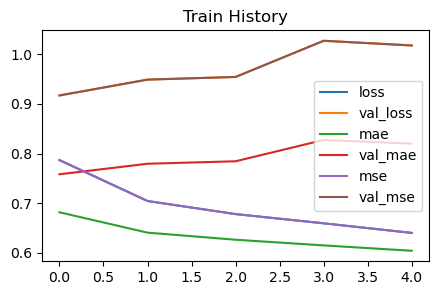

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.title('Train History')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['mae'], label='mae')
plt.plot(hist.history['val_mae'], label='val_mae')
plt.plot(hist.history['mse'], label='mse')
plt.plot(hist.history['val_mse'], label='val_mse')

plt.legend()
plt.show()

In [166]:
# x1, x2 두 개니까 리스트로 줘야 함. evaluate의 값은 0에 가까울수록 학습이 잘 된 것

model.evaluate([df['userId'], df['movieId']], df['rating']) 

32768/32768 [==============================] - 45s 1ms/step - loss: 0.6889 - mae: 0.6356 - mse: 0.6889


[0.6888839602470398, 0.6356143951416016, 0.6888839602470398]

```
model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])를 사용했다면, 
model.evaluate()의 반환값은 순서대로 '손실(MSE)', '평균 절대 오차(MAE)', 그리고 '평균 제곱 오차(MSE)'임.

따라서 [0.6888839602470398, 0.6356143951416016, 0.6888839602470398]의 각 값은 다음과 같음:

0.6888839602470398: MSE (Mean Squared Error), 즉 평균 제곱 오차임. 
    이는 실제 값과 모델이 예측한 값 사이의 차이를 제곱하여 평균낸 것. 
    이 값이 작을수록 모델의 성능이 좋다고 할 수 있음.
    
0.6356143951416016: MAE (Mean Absolute Error), 즉 평균 절대 오차입니다. 
    이는 실제 값과 모델이 예측한 값 사이의 차이를 절댓값으로 변환하여 평균낸 것.
    
마지막 0.6888839602470398: 다시 한번 MSE 값을 나타냄.
    
즉, 여기서 손실 함수로 사용된 MSE와 메트릭으로 추가된 MSE가 동일한 값을 가지므로 두 번 출력되었음.

평가 지표들은 일반적으로 낮을수록 좋습니다만, 
그 의미는 문제에 따라 달라짐. 
회귀 문제에서는 이러한 지표들을 통해 예측값과 실제값 사이의 차이를 수치화함.


. '손실(MSE)', '평균 절대 오차(MAE)', 그리고 '평균 제곱 오차(MSE)'의 값들은 모두 에러(오차)의 크기를 나타내는 지표임. 
이 값들이 0에 가까울수록 모델이 실제 값과 가까운 값을 예측하고 있다는 것을 의미.

따라서 이 경우, MSE와 MAE가 각각 약 0.69와 0.64인 것은 실제 값과 예측값 사이의 차이가 그만큼 있다는 것을 나타냄
```

```
model.evaluate() 함수는 모델의 손실 값(loss value)과 메트릭(metric) 값을 반환. 
반환되는 값의 수와 순서는 모델을 컴파일할 때 compile() 함수에 전달한 metrics 인자에 따라 달라짐.

예를 들어, 모델을 다음과 같이 컴파일했다면:


model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.evaluate()는 먼저 손실 값(loss), 그리고 지정한 메트릭인 정확도(accuracy)를 순서대로 반환.
```

In [169]:
# 모델이 예측한 평점 확인

model.predict([df['userId'][0].reshape(-1,1),df['movieId'][3].reshape(-1,1)])  # 예측값: 3.757547   # 실제값: 3.5   => 거의 비슷

1/1 [==============================] - 0s 27ms/step


array([[3.757547]], dtype=float32)

In [197]:
# 학습된 모델을 파일에 저장
model.save('my_model_recommend_model.keras')

In [204]:
# 파일 저장된 모델을 로드하는 방법

import tensorflow.keras
re_model = tensorflow.keras.models.load_model('my_model_recommend_model.keras')
pred = re_model.predict([df['userId'][0].reshape(-1,1),df['movieId'][3].reshape(-1,1)])  # 3.757547 => 파일 저장 전과 동일한 값 나옴
pred

1/1 [==============================] - 0s 87ms/step


array([[3.757547]], dtype=float32)

```
위의 오류

코드를 수정한 후 모델을 로드하고 예측을 수행한 결과를 보여주셨습니다. 
모델이 정상적으로 로드되고 예측을 수행한 것으로 보입니다.

경고 메시지(WARNING:tensorflow:...)는 TensorFlow에서 텐서 플로우 그래프를 만들 때 관련된 것입니다. 
이 경고 메시지는 함수가 반복적으로 추적되거나 텐서의 모양이 다른 경우에 발생할 수 있습니다. 
이 경우에는 일반적으로 무시해도 문제가 없습니다.

예측 값인 array([[3.757547]], dtype=float32)을 정상적으로 얻었으므로 모델이 예상대로 작동하는 것으로 보입니다. 
만약 모델의 성능을 평가하거나 다른 데이터에 대한 예측을 수행하려면 추가 작업을 수행할 수 있습니다.
```

In [ ]:
# 또는 파일 저장된 모델을 로드하는 방법

from tensorflow import keras
re_model = keras.models.load_model('my_model_recommend_model.keras')

##  강사님 버전: 함수형 입력 텐서 2개와 2개의 Embedding 레이어를 사용하는 신경망 생성
- Dot를 써서 식을 주지 않고 비선형으로 만들어서 하는 방법 => Concatenate() 을 이용
- Dot가 단순한 덧셈이나 곱셈만 되어 선형 결과만 가능하다 보니 선형보다 비선형인 Concatenate()가 더 정확함

In [ ]:
#강사님 버전

In [1]:
import numpy as np

x1 = np. random.randint(0, 100, 1000)  # 이용자에 해당 1000명내에서 100을 추출하므로 중복 많음
x2 = np. random.randint(0, 100, 1000)  # 영화에 해당

y = np.sqrt(x1**2+x2**2)   # 평점에 해당(루트 씌운 것)=> x1과 x2 사이의 거리가 됨. 결합을 위한 식 세움(누가 세우나......)
# 덧셈과 곱셈은 선형 결과만 나옴

x1.shape, x2.shape, y.shape

((1000,), (1000,), (1000,))

In [2]:
# 신경망 생성

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, Input, Flatten
from tensorflow.keras.layers import Dot, Concatenate

input1 = Input(shape=(1,)) 
embd1 = Embedding(1000+1, 20)(input1)  # 한사람을 숫자 20개로 영화 취향을 표현하겠단 의미
flat1 = Flatten()(embd1)    # 1차원으로 변경(결합한 뒤 사용해야 하므로)


input2 = Input(shape=(1,)) 
embd2 = Embedding(1000+1, 20)(input2)  
flat2 = Flatten()(embd2)

# 덧셈과 곱셈은 선형 결과만 나옴
#dot = Dot(axes=1)([flat1, flat2])     # 벡터의 내적 연산
# 1차원 벡터를 Dot를 이용해 내적하면 스칼라값을 생성(Dot는 이용자와 영화를 결합해 숫자 하나를 만들므로 dot는 평점에 해당하게 됨)

# Dot처럼 단순한 덧셈이나 곱셈이 아닌 결합을 하는 방법 => 비선형 가능
concat = Concatenate()([flat1, flat2])  # 리턴된 Tensor를 한 개의 숫자로.....
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)
out_tensor = Dense(1)(dense3)

model = Model([input1, input2], out_tensor)  # [input1, input2]이 학습됨(오차를 받아서 가중치를 학습)

```
Dot과 Concatenate는 Keras에서 제공하는 레이어 병합(merge) 방법들임.

Dot 연산은 두 벡터의 점곱(dot product)을 계산. 
이는 두 벡터의 유사성을 측정하는 방법 중 하나로, 벡터 간의 각도와 크기를 모두 고려함.
Concatenate 연산은 주어진 축을 따라 입력 배열을 연결(concatenate)함. 
이는 단순히 정보를 합치는 것으로, 원래의 특징들이 그대로 보존됨.

따라서 Concatenate가 Dot보다 정확도가 높게 나온다면, 
이것은 네트워크가 flat1과 flat2에서 제공하는 원본 특징 정보를 모두 사용하여 더 잘 학습하고 있음을 의미할 수 있음.

반면에, Dot 연산은 원본 특징들 사이의 관계만 고려하기 때문에 일부 정보가 손실될 수 있음. 
따라서 문제에 따라서 어떤 병합 방법인지에 따라 성능이 달라질 수 있음.

즉, 어떤 방식이 "더 좋다"고 단정적으로 말하기보다는 사용하고 있는 데이터와 문제 상황에 따라 적절한 병합 방식을 선택해야 함.
```

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 20)                20020     ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 20)                20020     ['input_2[0][0]']             
                                                                                              

In [4]:
# 여기서 손실함수는 mse인 이유 동영상 확인 필요

model.compile(loss='mse', optimizer='adam')

In [5]:
# 공식을 알려주지 않는 Concatenate()을 썼음에도 loss가 0에 근접하고 학습되고 있음

hist = model.fit([x1.reshape(-1,1), x2.reshape(-1,1)], y, batch_size=10, epochs=300, verbose=1, validation_split=0.2)

Epoch 1/300
80/80 [==============================] - 2s 4ms/step - loss: 5662.0396 - val_loss: 1811.7521
Epoch 2/300
80/80 [==============================] - 0s 2ms/step - loss: 606.9495 - val_loss: 203.4261
Epoch 3/300
80/80 [==============================] - 0s 2ms/step - loss: 101.0803 - val_loss: 50.0013
Epoch 4/300
80/80 [==============================] - 0s 2ms/step - loss: 40.2997 - val_loss: 30.8028
Epoch 5/300
80/80 [==============================] - 0s 3ms/step - loss: 31.7294 - val_loss: 28.4692
Epoch 6/300
80/80 [==============================] - 0s 2ms/step - loss: 27.5614 - val_loss: 26.8900
Epoch 7/300
80/80 [==============================] - 0s 2ms/step - loss: 24.9611 - val_loss: 20.9790
Epoch 8/300
80/80 [==============================] - 0s 3ms/step - loss: 16.8685 - val_loss: 13.8472
Epoch 9/300
80/80 [==============================] - 0s 3ms/step - loss: 10.2199 - val_loss: 8.6939
Epoch 10/300
80/80 [==============================] - 0s 2ms/step - loss: 6.2328 - va

Epoch 83/300
80/80 [==============================] - 0s 4ms/step - loss: 0.9585 - val_loss: 1.4677
Epoch 84/300
80/80 [==============================] - 0s 4ms/step - loss: 1.6958 - val_loss: 1.7986
Epoch 85/300
80/80 [==============================] - 0s 4ms/step - loss: 1.7534 - val_loss: 1.7132
Epoch 86/300
80/80 [==============================] - 0s 4ms/step - loss: 1.6446 - val_loss: 2.0563
Epoch 87/300
80/80 [==============================] - 0s 4ms/step - loss: 1.6050 - val_loss: 1.7877
Epoch 88/300
80/80 [==============================] - 0s 4ms/step - loss: 2.2610 - val_loss: 3.9533
Epoch 89/300
80/80 [==============================] - 0s 4ms/step - loss: 3.9265 - val_loss: 3.7966
Epoch 90/300
80/80 [==============================] - 0s 4ms/step - loss: 2.5056 - val_loss: 1.7367
Epoch 91/300
80/80 [==============================] - 0s 4ms/step - loss: 1.5991 - val_loss: 1.7817
Epoch 92/300
80/80 [==============================] - 0s 5ms/step - loss: 1.0313 - val_loss: 1.6367


80/80 [==============================] - 0s 3ms/step - loss: 1.1310 - val_loss: 1.0222
Epoch 246/300
80/80 [==============================] - 0s 3ms/step - loss: 0.9171 - val_loss: 1.4059
Epoch 247/300
80/80 [==============================] - 0s 2ms/step - loss: 0.8595 - val_loss: 0.9007
Epoch 248/300
80/80 [==============================] - 0s 2ms/step - loss: 0.7531 - val_loss: 0.9902
Epoch 249/300
80/80 [==============================] - 0s 2ms/step - loss: 0.5266 - val_loss: 0.6561
Epoch 250/300
80/80 [==============================] - 0s 2ms/step - loss: 0.6531 - val_loss: 0.9719
Epoch 251/300
80/80 [==============================] - 0s 2ms/step - loss: 0.9918 - val_loss: 1.0684
Epoch 252/300
80/80 [==============================] - 0s 2ms/step - loss: 0.7042 - val_loss: 0.7639
Epoch 253/300
80/80 [==============================] - 0s 2ms/step - loss: 0.5787 - val_loss: 0.6206
Epoch 254/300
80/80 [==============================] - 0s 2ms/step - loss: 0.4456 - val_loss: 1.3259
Epoc

In [6]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

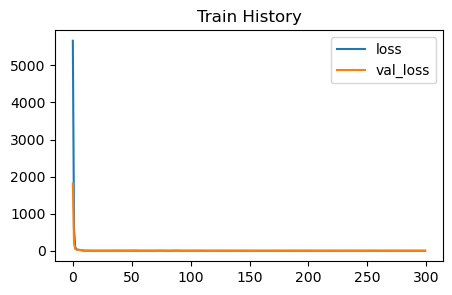

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.title('Train History')

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')


plt.legend()
plt.show()

In [9]:
# 학습 잘 되었는지 확인(0에 가까울수록 학습 잘 된 것)
# 신경망과 파라미터에 따라서 정확도가 완전히 달라지는 것을 알 수 있음
model.evaluate([x1, x2], y)  # Dot일 때는 47.61332321166992 이었던 학습 정확도가 0.5153300166130066로 나옴

32/32 [==============================] - 0s 2ms/step - loss: 0.5153


0.5153300166130066

```
model.evaluate() 함수는 모델의 손실 함수(loss function) 값과 선택적으로 몇 가지 메트릭(metric) 값을 반환함. 
손실 함수의 값이 0에 가까울수록 모델이 학습 데이터를 잘 예측하고 있다는 것을 의미.

그러나 이것은 항상 "학습이 잘 되었다"는 것을 의미하지는 않음. 
모델이 훈련 데이터에 과도하게 적합(overfitting)되어 있을 경우, 
훈련 데이터에 대한 손실은 매우 낮지만, 새로운 데이터, 즉 검증 또는 테스트 데이터에 대한 성능은 상대적으로 낮을 수 있음.

따라서 모델의 일반화 성능을 평가하기 위해서는 검증 또는 테스트 데이터셋에서의 손실값 뿐만 아니라 
다른 메트릭(정확도, 정밀도, 재현율 등)들도 함께 고려해야 함.
```

In [10]:
# 모델이 예측한 평점 확인
model.predict([x1[0].reshape(-1,1),x2[10].reshape(-1,1)])   # 첫번째 사람은 열번째 영화에 대해 어떻게 평가를 할까? 58.406624
# 첫 번째 사람은 열 번째 영화의 평점을 58.406624 줄 것 같다고 예측한 것

1/1 [==============================] - 0s 167ms/step


array([[58.406624]], dtype=float32)

In [11]:
# 실제 데이터 평점 확인   # 첫번째 사람은 열번째 영화에 대해 어떻게 평가를 할까?  59.033888572581766
np.sqrt(x1[0]**2+x2[10]**2)  # Concatenate()을 사용하니 모델이 학습한 값과 실제 값이 거의 일치하게 되었음
# 첫 번째 사람은 열 번째 영화의 평점을 59.033888572581766을 준 게 실제 평점 값

59.033888572581766

In [ ]:
# 문제) 위 학습한 모델을 가지고 
# x1[0] : 이용자 번호로 간주
# x2 : 영화 번호로 간주
# x1[0] 이용자가 전체 영화 중에서 가장 좋아할 것으로 추정되는 영화 번호는?


# 강사님 버전

In [13]:
# 이용자는 한 사람을 주고, 영화를 1000개를 주면 model이 훈련된 방식은 그게 아니기 때문에 계산을 못하므로 
# 한 이용자가 전체 영화 중에서 가장 좋아할 것으로 추정되는 영화 번호를 구하려면 한 명의 이용자 또한 천 명으로 바꿔서 줘야 함

# 이용자 한 명의 id 번호를 리스트 안에 1000개를 넣어서 천 명을 만드는 것과 같은 효과를 만듬

user = [x1[0] for _ in range(1000)]
user = np.array(user)
user.shape
user[:5]      

array([58, 58, 58, 58, 58])

In [15]:
# 이용자는 한 사람을 주고, 영화를 1000개를 주면 model이 훈련된 방식은 그게 아니기 때문에 계산을 못하므로 
# 한 이용자가 전체 영화 중에서 가장 좋아할 것으로 추정되는 영화 번호를 구하려면 특정 한 이용자를 천 명으로 바꿔서 줘야 함
# [user.reshape(-1,1), x2.reshape(-1,1)]  => 이용자 1000명, 영화 1000개 학습시킨대로 맞춰줌


# 학습된 모델에 데이터를 입력하거나 예측 결과를 받아올 때는 주로 2차원 배열을 사용.
# 하지만 개별적인 예측 결과(argmax() 등 가장 확률이 높은 클래스 등)를 확인하려면 다시 1차원으로 바꾸어 처리하는 것이 편리
# pred 가 평점(이걸 y로 줘서 학습했으므로)이고 max_index가 평점이 가장 높은 영화 번호가 됨


pred = model.predict([user.reshape(-1,1), x2.reshape(-1,1)])  # 입력이 2개니 리스트로 만들어서 받음/2차원으로 만들어줌
max_index = pred.flatten().argmax()
max_index    # 926번째 영화를 첫번째 이용자가 평점이 가장 높을 것으로 예측

32/32 [==============================] - 0s 1ms/step


926

In [17]:
# x1[0] 이용자가 가장 좋아할 것으로 여겨지는 영화에 대한 평점은?

predict = model.predict([x1[0].reshape(-1,1), x2[max_index].reshape(-1,1)])    
predict    # array([[115.18805]], dtype=float32)   => 115점

1/1 [==============================] - 0s 28ms/step


array([[115.18805]], dtype=float32)

# 강사님 버전:실제 영화 평점 데이터를 이용한 추천시스템 만들기

In [ ]:
# 강사님 버전

In [18]:
import pandas as pd
df = pd.read_csv('https://cwisky.github.io/public/movie_ratings.csv')
df

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376


In [19]:
max(df['userId'])   # 7120

7120

In [20]:
size_of_userid = df['userId'].nunique()   # nunique()는 unique()한 뒤에 len() 할 필요 없이 바로 그 두 개의 효과를 가져옴
size_of_userid   # 7120

7120

In [23]:
df['movieId'].nunique()   #  => 'movieId' 열에서 고유한 값의 개수를 반환 / 서로 다른 영화 ID의 수     # 14026 
max(df['movieId'])        #  => 'movieId' 열에서 가장 큰 값을 반환     # 130642 
size_of_movieid = max(df['movieId'])
size_of_movieid      # 130642

130642

In [ ]:
# Embedding(input_dim=1000, )으로 설정한 경우 인덱스는 999까지만 사용 가능
# https://keras.io/api/layers/core_layers/embedding/

In [27]:
# 신경망 생성 / 딥러닝을 이용한 이용자 감정 분석

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding, Input, Flatten, Concatenate

input1 = Input(shape=(1,)) 
embd1 = Embedding(size_of_userid+1, 20)(input1)  # 중복되지 않은 입력데이터의 개수+1, 한 사람을 숫자 20개로 영화 취향을 표현하겠단 의미
flat1 = Flatten()(embd1)    # 1차원으로 변경(결합한 뒤 사용해야 하므로)


input2 = Input(shape=(1,)) 
embd2 = Embedding(size_of_movieid+1, 20)(input2)  
flat2 = Flatten()(embd2)

# 덧셈과 곱셈은 선형 결과만 나옴
#dot = Dot(axes=1)([flat1, flat2])     # 벡터의 내적 연산
# 1차원 벡터를 Dot를 이용해 내적하면 스칼라값을 생성(Dot는 이용자와 영화를 결합해 숫자 하나를 만들므로 dot는 평점에 해당하게 됨)

# Dot처럼 단순한 덧셈이나 곱셈이 아닌 결합을 하는 방법 => 비선형 가능
concat = Concatenate()([flat1, flat2])  # 리턴된 Tensor를 한 개의 숫자로.....
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)
out_tensor = Dense(1)(dense3)

model = Model([input1, input2], out_tensor)  # [input1, input2]이 학습됨(오차를 받아서 가중치를 학습)

```
Embedding 레이어는 주로 범주형 데이터를 처리할 때 사용됨. 
이 레이어는 각 범주형 값(여기서는 'userId'와 'movieId')을 고차원 공간에서의 점, 즉 임베딩으로 변환함.

Embedding(size_of_userid+1, 20)에서 size_of_userid+1은 임베딩 레이어의 입력 차원수를 의미하며, 
여기서는 고유한 사용자 ID의 수보다 1 큰 값을 입력 차원수로 설정했음. 
'+1'은 일반적으로 0을 위한 예비 인덱스로 사용되며, 실제 데이터에 없는 특별한 값을 나타내기 위해 추가하는 것.

마찬가지로 Embedding(size_of_movieid+1, 20)에서 
size_of_movieid+1은 영화 ID 중 가장 큰 값을 기준으로 임베딩 레이어의 입력 차원수를 설정했음. 
이 경우에도 '+1'은 예비 인덱스용.

그런데 여기서 중요한 점은 'movieId' 값들이 연속적인 정수가 아닐 수 있다는 것. 
즉, 'movieId'에 대해 nunique() 함수를 사용하면 고유한 영화 ID의 개수만을 반환하지만, 
만약 일부 영화 ID가 빠져있다면 이 방식으로 Embedding 레이어를 구성하면 에러가 발생할 수 있음. 
따라서 안전하게 가장 큰 'movieId' 값에 기반하여 Embedding 레이어의 입력 차원을 설정하는 것.

그리고 20은 임베팅 벡터의 크기로써, 각각의 userId와 movieId를 20차원 벡터로 표현한다는 의미임. 
이 숫자는 하나의 범주(영화나 사용자)를 얼마나 많은 정보로 표현할 것인지 결정하는 하이퍼파라미터임.

즉 Embedding Layer에서 (size_of_userid+1, 20)과 (size_of_movieid+1, 20)은 
각각 userId와 movieId가 갖게 될 벡터공간 상에서 위치(임베팅)과 그 위치를 표현할 정보량(차원)을 결정하는 역할을 함. 
이렇게 설정된 임베딩은 모델이 학습하는 과정에서 최적화됨.


Embedding 레이어는 각 범주형 데이터(여기서는 userId와 movieId)를 고차원 공간에서의 점, 즉 임베딩으로 변환하는 역할을 함. 
이렇게 하면 범주형 데이터가 가진 정보를 실수값의 밀집 벡터로 표현할 수 있게 됨.

Embedding(size_of_userid+1, 20)에서 size_of_userid+1은 임베딩 레이어의 입력 차원 수임. 
이는 각 사용자 ID를 나타내기 위한 공간의 크기라고 생각하면 됨. 
'+1'은 일반적으로 0을 위한 예비 인덱스로 사용됩니다.

그리고 20은 임베팅 벡터의 크기로, 각각의 userId와 movieId를 어떤 크기의 밀집 벡터로 표현할지 결정함. 
이 숫자는 하나의 범주(영화나 사용자)를 얼마나 많은 정보로 표현할 것인지 결정하는 요소임.

즉, (size_of_userid+1, 20)과 (size_of_movieid+1, 20)는 각각 userId와 movieId가 어떤 공간에 위치하며 
그 위치를 어떻게 표현할 것인지 결정하는 역할을 함.


Embedding 레이어는 범주형 데이터를 처리하기 위한 레이어임. 
이때 범주형 데이터의 각 값은 임베딩 테이블의 인덱스로 사용되며, 
이 인덱스에 따라 해당 범주가 고차원 공간에서 어디에 위치할지(즉, 어떤 밀집 벡터로 표현될지) 결정됨.

예를 들어 'movieId'가 1부터 5까지 연속적인 정수라면 Embedding(6, 20)으로 임베딩 레이어를 설정할 수 있음
(0을 위한 예비 인덱스 때문에 +1을 해줌). 

이렇게 하면 각 'movieId' 값(1~5)은 임베딩 테이블의 인덱스로 사용되고, 각 영화는 20차원 벡터로 표현됨.

그런데 만약 'movieId'가 연속적인 정수가 아니라고 한다면? 
예를 들어 'movieId'가 {1,2,3,10000}와 같은 값을 가진다면? 
여기서 고윳값의 개수는 4개이나 만약 Embedding(df['movieId'].nunique()+1, 20)과 같은 방식으로 임베팅 라키오 설정한다면 
Embedding 라키오의 크기는 (5,20)이 됨. 
즉 임베팅 테이블에서 인덱스는 최대 4까지밖에 없음.

그런데 데이터 안에 movieId=10000인 영화도 있으므로 
모델을 학습시킬 때 이 영화 ID를 처리하려고 하면 에러가 발생하게 됨. 
왜냐하면 우리의 임베팅 테이블에서 인덱스=10000 위치는 존재하지 않기 때문.
'movieId'가 연속적인 정수를 가지지 않고 일부 값이 누락되어 있다면, 그 값들은 임베딩 테이블에서 인덱스로 사용될 수 없음.

따라서 이 문제를 해결하기 위해서 우리는 max(df['movieId'])+1과 같은 방식으로 임베팅 라키오의 크기를 설정함. 
이렇게 하면 'movieId' 값 중 가장 큰 값까지 인덱스로 사용할 수 있는 충분한 공간이 임베팅 테이블에 확보되기 때문에 
에러 없이 모든 영화 ID를 처리할 수 있음.
```

In [28]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 1, 20)                142420    ['input_3[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, 1, 20)                2612860   ['input_4[0][0]']             
                                                                                            

In [30]:
model.compile(loss='mse', optimizer='adam')

In [31]:
# Python에서는 소수점 아래의 숫자를 표현할 때 0.을 생략하고 .2와 같이 쓸 수 있음. 
# validation_split=0.2와 validation_split=.2는 동일한 의미

hist = model.fit([df['userId'], df['movieId']], df['rating'],batch_size=10, epochs=5, verbose=1, validation_split=.2)

Epoch 1/5
83886/83886 [==============================] - 3263s 39ms/step - loss: 0.7889 - val_loss: 0.9355
Epoch 2/5
83886/83886 [==============================] - 3967s 47ms/step - loss: 0.7057 - val_loss: 0.9497
Epoch 3/5
83886/83886 [==============================] - 2986s 36ms/step - loss: 0.6782 - val_loss: 0.9178
Epoch 4/5
83886/83886 [==============================] - 3076s 37ms/step - loss: 0.6605 - val_loss: 0.9886
Epoch 5/5
83886/83886 [==============================] - 17400s 207ms/step - loss: 0.6431 - val_loss: 0.9890


In [33]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

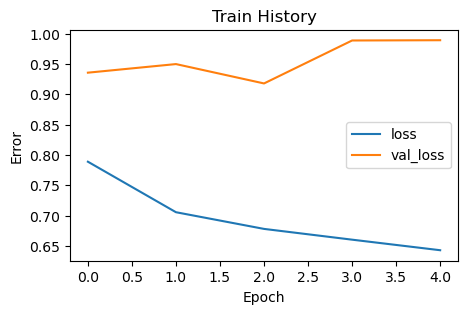

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.title('Train History')

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')

plt.legend()
plt.show()

In [38]:
model.evaluate([df['userId'], df['movieId']], df['rating'])

32768/32768 [==============================] - 39s 1ms/step - loss: 0.6851


0.685148298740387

In [41]:
array_of_all_unique_movies = df['movieId'].unique()
# 데이터프레임 df의 'movieid' 열에서 유일한 값들만을 추출하여 numpy 배열로 반환. 
# 중복되지 않는 'movieid' 값들만을 가져옴
# 이를 통해 데이터셋 내에 있는 모든 고유한 영화 ID를 가져올 수 있음

# Numpy 배열은 파이썬 기본 리스트보다 더 효율적인 메모리 사용과 빠른 연산 속도를 제공.
# 대부분의 데이터 분석 및 머신러닝 라이브러리(예: scikit-learn, TensorFlow 등)은 입력으로 numpy 배열을 받음.

array_of_all_unique_movies[:5]  #array([ 2, 29, 32, 47, 50], dtype=int64)

array([ 2, 29, 32, 47, 50], dtype=int64)

```
Numpy 배열은 1차원뿐만 아니라 다차원 데이터를 표현할 수 있음.

예를 들어, 1차원 배열은 벡터(vector)를 나타낼 때 사용하며, 2차원 배열은 행렬(matrix)을 나타낼 때 사용함. 
더 높은 차원의 배열도 가능하며, 이는 주로 다차원 데이터셋을 처리할 때 사용됨.

Numpy는 이러한 다양한 차원의 배열을 쉽게 생성하고 조작할 수 있는 기능을 제공함. 
예를 들어, numpy.array() 함수를 사용하여 리스트나 리스트의 리스트 등으로부터 numpy 배열을 생성할 수 있음:


# 1D array
a = np.array([1, 2, 3])

# 2D array
b = np.array([[1, 2], [3, 4]])

# 3D array
c = np.array([[[1, 2], [3, 4]], [[5, 6], [7,8]]])

이처럼 Numpy는 데이터의 복잡성과 크기에 관계없이 일관된 방식으로 데이터를 처리하는 강력한 도구임.
```

In [42]:
# model predict(이용자, 모든 영화)
# 1번 이용자가 모든 영화에 대해 평점을 준다면?
# 리스트 컴프리헨션 이용

user1 = [1 for _ in array_of_all_unique_movies]    #  모든 영화에 번호가 있으므로 영화 수만큼 1을 만들어 리스트에 넣음

# 이거 말고도 배열 만드려면 numpy의 ones를 사용해도 됨
# user1 = np.ones(len(array_of_all_unique_movies)) 
# => 이렇게 하면 위의 리스트 컴프리헨션과 동일한 결과가 나옴.

# two_dimensional_array = np.ones((5, 5))
# => 이렇게 원하는 차원에 맞게 배열을 생성해주기도 함
# =>  (5, 5) 형태의 2차원 배열을 만들게 됨
# (5, 5)는 생성할 배열의 형태(shape). 이 경우, 각각 5개씩 총 25개(=5x5)의 원소가 모두 값 '1'인 행렬을 만듬


user1[:5]   
user1 = np.array(user1)    
user1.shape      # (14026,)

(14026,)

In [ ]:
# 참고) np.zeros((3,3))는 모든 원소가 '0'인 (3x3) 크기의 행렬을 만듬

```
위 코드에서 _는 변수명으로, 보통 반복문에서 사용하지 않을 임시 변수에 주로 사용됨.

따라서 [1 for _ in array_of_all_unique_movies] 이 코드는 'array_of_all_unique_movies'의 각 요소를 순회하면서 
그때마다 1을 생성하여 새로운 리스트에 추가하는 것. 
결과적으로 이 코드는 'array_of_all_unique_movies'의 길이와 동일한 길이를 가진, 
모든 요소가 1인 리스트를 생성.

즉, user1 = [1 for _ in array_of_all_unique_movies] 라는 코드는 
모든 영화에 대해 사용자 1이 평점을 준 것처럼 만드는 작업을 수행하는 것. 
여기서 user1[:5]와 같은 코드를 통해 리스트의 처음 5개 요소만 출력할 수 있음.


리스트 컴프리헨션에서 1은 단순히 임의의 값으로 선택된 것일 수 있음. 
여기서 중요한 점은 리스트의 길이가 'array_of_all_unique_movies'의 길이와 동일하다는 점. 
즉, 각 영화에 대해 사용자 1이 어떤 액션(여기서는 평점을 주는 행위)을 수행했다고 가정하는 것.

만약 이 코드가 예측 모델의 입력 데이터를 준비하는 과정의 일부라면, 1은 사용자 ID를 의미할 수 있음. 
즉, 모든 영화에 대해 사용자 1이 평점을 매겼다고 가정하고 그에 해당하는 데이터를 생성하는 것.
```

In [43]:
pred = model.predict([user1, array_of_all_unique_movies]) # [1 for _ in array_of_all_unique_movies]을 통해 uer1 개수 맞춰줌
pred[:5]

439/439 [==============================] - 1s 1ms/step


array([[3.864276 ],
       [3.6125562],
       [3.815144 ],
       [4.147366 ],
       [4.164252 ]], dtype=float32)

In [45]:
pred2 = pred.flatten()
pred2.shape
(-pred2).argsort()   # array([  12, 1854, 2087, ..., 8644, 5285, 3738], dtype=int64)

array([  12, 1854, 2087, ..., 8644, 5285, 3738], dtype=int64)

In [46]:
# 최고의 평점을 줄 것으로 추정되는 영화 번호 10개
idx =  (-pred2).argsort()[:10]
idx      
# 결과:array([  12, 1854, 2087,  998,  369, 1851,  158,   31,  131,  331], dtype=int64)

array([  12, 1854, 2087,  998,  369, 1851,  158,   31,  131,  331],
      dtype=int64)

In [53]:
import os
print(os.getenv('TMPDIR'))  # None
print(os.getenv('TEMP'))   # C:\Users\정진화\AppData\Local\Temp
print(os.getenv('TMP'))    # C:\Users\정진화\AppData\Local\Temp

None
C:\Users\정진화\AppData\Local\Temp
C:\Users\정진화\AppData\Local\Temp


In [54]:
# 모델 저장시 FailedPreconditionError: C:\Users\정진화\AppData\Local\Temp\tmpycdqw8u3 is not a directory 오류
# 그래서 임시 디렉토리 변경
os.environ['TMP'] = '/Users/jeongjinhwa/anaconda3/A_Python_Day1'

In [55]:
# 모델 저장시 FailedPreconditionError: C:\Users\정진화\AppData\Local\Temp\tmpycdqw8u3 is not a directory 오류

# 학습된 모델을 파일에 저장
model.save('/Users/jeongjinhwa/anaconda3/A_Python_Day1/training_model/model_recommend_model.keras')

FailedPreconditionError: C:\Users\정진화\AppData\Local\Temp\tmpvc24yvpc is not a directory

In [ ]:
# 파일 저장된 모델을 로드하는 방법

import tensorflow.keras
re_model = keras.models.load_model('model_recommend_model.keras')

In [ ]:
pred = re_model.predict([user1, array_of_all_unique_movies])  # 3.757547 => 파일 저장 전과 동일한 값 나옴
pred[:5]

```
<내 방식과 강사님 방식의 차이>

=> 강사님은 영화 아이디가 연속적인 숫자가 아닐 수도 있다는 것을 감안하지 않고 실행한 것. pd.factorize 함수 사용 안 하셨음

이 두 코드 사이의 주요 차이점은 Embedding layer에 전달하는 입력 값의 최대 크기임.

Embedding layer는 입력으로 받는 정수를 해당 정수의 벡터 표현으로 변환하는 역할을 함. 
이때, Embedding layer에 전달하는 첫 번째 인자는 입력 데이터에서 가능한 가장 큰 정수(즉, 단어 집합의 크기)보다 1이 더 커야 함.

첫 번째 코드(내 코드)에서는 pd.factorize 함수를 사용하여 'userId'와 'movieId'를 각각 0부터 시작하는 연속적인 정수로 변환함. 
따라서 'userId'와 'movieId'의 최대 값은 각각 고유한 사용자 수와 영화 수보다 작거나 같음. 
그래서 Embedding layer에 (num_unique_users+1)과 (num_unique_movies+1)을 전달하면 
모든 'userId'와 'movieId' 값을 처리할 수 있음.

반면에 두 번째 코드(강사님 코드)에서는 pd.factorize 함수를 사용하지 않고 
원래 데이터에서 'userId'와 'movieId'의 최대 값을 구하여 Embedding layer에 전달함.
여기서 문제가 발생할 수 있는데, 그 이유는 movieId가 연속적인 숫자로 구성되어 있지 않고 
중간중간 비어있는 숫자가 있을 가능성이 있기 때문임. 
예를 들어, movieId가 [1, 2, 4]처럼 주어진 경우면 3은 누락된 것.

따라서 만약 movieId 중간중간 비어있는 숫자가 있다면 
첫 번째 방식(pd.factorize)을 사용해야 오류 없이 실행됨. 
반면 movieId가 연속적인 숫자로 구성되어 있다면 두 번째 방식도 문제 없이 실행될 것임.

즉, 어느 방식을 선택하느냐는 데이터셋의 특성에 따라 결정되며, 일반적으로 pd.factorize 방식은 보다 안전한 편.

'userId'에 대해서도 중간에 누락된 값이 있을 수 있음. 
이 경우에도 pd.factorize 함수를 사용하면 'userId'와 'movieId' 모두를 연속적인 정수로 변환할 수 있어 
이러한 문제를 방지할 수 있음.

즉, pd.factorize 함수는 고유한 값들을 0부터 시작하는 연속적인 정수로 변환해주므로 
입력 데이터의 누락된 값이나 비연속적인 값을 처리하는 데 유용함.

따라서 pd.factorize 함수는 사용자 ID나 영화 ID와 같이 고유 식별자가 연속되지 않거나 중간에 비어있는 경우 등에서 
안전하게 인덱싱을 할 수 있는 방법을 제공함. 
이렇게 변환된 인덱스는 Embedding layer의 입력으로 사용됨.

그러므로 첫 번째 코드처럼 pd.factorize를 사용하여 'userId'와 'movieId'를 처리하는 것이 일반적으로 안전한 방법임.
```

# flask 설치

In [173]:
!pip install flask

### flask 설치 후 웹서버 실행환경 구성
- flask_web등으로 이름을 정하여 디렉토리 생성 후 
- 아래의 코드를 flask_web/app.py에 저장한다
- 아나콘다 프롬프트에서 python.app.py 영향으로 flask 웹서버가 작동한다(아나콘다 프롬프트에서 (base) C:\Users\201-17\A_Python_Day1\flask_web>python app.py로 실행)
- http://localhost:[포트번호]/
- localhost:7878/   => 'Hello World!'가 화면에 표시됨
- localhost:7878/admin   => 'Hello Admin'이 화면에 표시됨

In [196]:
%%writefile flask_web/app.py

# app.py
from flask import Flask
app = Flask(__name__)
app.config['JSON_AS_ASCII'] = False

print('Flask running~')

@app.route('/')
def index():
    return '<h1>Hello World!</h1>'

@app.route('/test')
def test():
    import json
    data = {}
    data['no'] = 11
    data['name'] = 'Smith'
    data['phone'] = '010-2547-5129'
    #js_str = json.dumps(data)
    js_str = json.dumps(data, ensure_ascii=False).encode('utf8')   # 한글일 경우
    return js_str

# get, post parameter 
@app.route('/login',methods = ['POST', 'GET'])
def login():
    from flask import request
    from flask import Flask, redirect, url_for
    return redirect(url_for('test'))
    if request.method == 'POST':
        user = request.form['nm']
         # 주소창에 http://localhost:7878/login?nm=smith  입력시 
        # 주소가 http://localhost:7878/test 이걸로 자동 바뀌면서 {"no": 11, "name": "Smith", "phone": "010-2547-5129"} 확인됨
        return redirect(url_for('success',name = user))  
    else:
        user = request.args.get('nm')
        return redirect(url_for('success',name = user))

# path variable
@app.route('/hello/<name>')
def hello_name(name):
    return 'Hello %s!' % name    # http://localhost:7878/hello/smith  입력시 Hello smith!
# path variable ( int, float, path)
@app.route('/blog/<int:bnum>')
def blog_read(bnum):
    return 'Blog %s!' % bnum

# redirect
@app.route('/admin')
def hello_admin():
    return 'Hello Admin'

@app.route('/guest/<guest>')
def hello_guest(guest):
    return 'Hello %s as Guest' % guest

@app.route('/user/<name>')
def hello_user(name):
    if name =='admin':
        return redirect(url_for('hello_admin'))   # hello_admin()으로 리다이렉트
    else:
        return redirect(url_for('hello_guest',guest = name))  # 리다이렉트(변수)

app.run(host='0.0.0.0', debug=True, port=7878)

Overwriting flask_web/app.py


In [194]:
# 플라스크를 이용해 웹 서버 이용시

# POST 방식 요청 예  => 자바에 이 내용으로 클래스 만듬

import java.io.BufferedReader;
import java.io.InputStreamReader;
import java.io.OutputStream;
import java.net.HttpURLConnection;
import java.net.URL;

import org.json.simple.JSONObject;

public class Main 
{
   public static void main(String[] args) 
   {
      URL url;
      try {
         url = new URL("http://localhost:7878/add/json");

           HttpURLConnection connection = (HttpURLConnection) url.openConnection();

           connection.setRequestMethod("POST");     // POST 방식 요청
           //connection.setRequestProperty("User-Agent", USER_AGENT);

           // Flask 서버에 JSON 문자열을 전송하려면 아래처럼 설정
           connection.setRequestProperty("Content-Type", "application/json");
           connection.setDoOutput(true);

           JSONObject jsobj = new JSONObject();             # JSON 문자열 준비 
           jsobj.put("id", 14);
           jsobj.put("title", "Hello~");
           jsobj.put("content", "Good morning everyone!");
           
           OutputStream os = connection.getOutputStream();
           os.write(jsobj.toJSONString().getBytes());         # JSON 문자열을 서버로 전송 
           os.flush();
           os.close();

           int responseCode = connection.getResponseCode();
           System.out.println("Book 추가 결과(응답코드):" + responseCode);

           BufferedReader bufferedReader = new BufferedReader(new InputStreamReader(connection.getInputStream()));
           StringBuffer stringBuffer = new StringBuffer();
           String inputLine;

           while ((inputLine = bufferedReader.readLine()) != null)  {
               stringBuffer.append(inputLine);
           }
           bufferedReader.close();

           String response = stringBuffer.toString();
           
      }catch(Exception ex) {
         ex.printStackTrace();
      }
   }
}


SyntaxError: invalid syntax (1825953814.py, line 10)

In [193]:
# 플라스크를 이용해 웹 서버 이용시

# /* GET 방식 요청 예 */  => 자바에 이 내용으로 클래스 만듬
import java.io.BufferedReader;
import java.io.DataOutputStream;
import java.io.IOException;
import java.io.InputStreamReader;
import java.net.HttpURLConnection;
import java.net.URL;

public class Main2 {
    private static final String URL = "https://www.google.com";
    private static final String GET = "GET";
    private static final String USER_AGENT = "Mozilla/5.0";
    private static final String DATA = "test data";

    public static void main(String[] args) throws IOException {
        URL url = new URL(URL);
        HttpURLConnection connection = (HttpURLConnection) url.openConnection();

        connection.setRequestMethod(GET);    // GET 방식 요청
        connection.setRequestProperty("User-Agent", USER_AGENT);

        int responseCode = connection.getResponseCode();

        BufferedReader bufferedReader = new BufferedReader(new InputStreamReader(connection.getInputStream()));
        StringBuffer stringBuffer = new StringBuffer();
        String inputLine;

        while ((inputLine = bufferedReader.readLine()) != null)  {
            stringBuffer.append(inputLine);
        }
        bufferedReader.close();

        String response = stringBuffer.toString();
    }
}

SyntaxError: invalid syntax (2774785788.py, line 9)

```
# 문제) 

# 강사님이 만든 모델 파일을 이용해 플라스크해서 로드해서 추천이 되게 해서 웹 브라우저 화면에 추천 내용이 확인되게 하기
http://localhost:7878/movie?userid=1
@app.route('/movie',methods =['POST','GET'])
def movie_recommend():
    # userid 파라미터 추출
    # 영화추천모델 로드
    # 이용자 번호를 영화의 수만큼 생성
    # pred  = model.predict([userid, movie_all])
    # pred = pred[:10]
return str(pred)

# 파일에 저장된 추천모델을 로드하여 요청한 웹브라우저에 응답메시지로 전송한다
```

In [7]:
%%writefile app.py

# app.py
from flask import Flask, request
app = Flask(__name__)
app.config['JSON_AS_ASCII'] = False

print('Flask running~')

#import tensorflow.keras
#re_model = tensorflow.keras.models.load_model('movie_recommend_model.keras')

@app.route('/')
def index():
    return '<h1>Hello World!</h1>'


# get, post parameter     
@app.route('/movie', methods = ['GET'])   # http://localhost:7878/movie?userid=1 주소창에 입력
# http://localhost:7878/movie?userid=1 입력시 결과 =>  [ 12 2087 50 2086 2823 187 261 9 158 148]
def movie_recommend():
    import tensorflow.keras
    import numpy as np
    import pandas as pd
    from tensorflow import keras
    
    user = request.args.get('userid')
    userid = int(user)
    df = pd.read_csv('https://cwisky.github.io/public/movie_ratings.csv')   
    array_of_all_unique_movies = df['movieId'].unique()
    user_arr = np.array([userid for _ in array_of_all_unique_movies])
    re_model = keras.models.load_model('movie_recommend_model.keras')
    pred = re_model.predict([user_arr, array_of_all_unique_movies])
    pred = pred.flatten()
    pred_sorted = (-pred).argsort()
    
    return str(pred_sorted[:10])


app.run(host='0.0.0.0', port=7878)

Overwriting app.py


```

<자바스크립트와 연동 문제>

Java 코드는 Flask 애플리케이션에 HTTP GET 요청을 보내는 역할을 함. 
이 요청은 "http://localhost:7878/movie?userid=1" URL로 보내지며, Flask 앱에서는 이를 받아 처리함.

그러나 현재 제공된 Java 코드에서는 URL 변수가 Google의 홈페이지 URL인 "https://www.google.com"으로 설정되어 있음. 
따라서 이 상태로 실행하면 Java 프로그램은 Google의 홈페이지에 HTTP GET 요청을 보낼 것임.

Flask 앱에 요청을 보내려면 URL 변수를 다시 "http://localhost:7878/movie?userid=1"로 변경해야 함


private static final String URL = "http://localhost:7878/movie?userid=1";
그리고 현재 Java 코드에서는 HTTP 응답 내용(response)를 출력하지 않고 있음. 
결과를 확인하려면 System.out.println(response); 를 추가해야 함:


String response = stringBuffer.toString();
System.out.println(response);

이렇게 수정하고 실행하면 콘솔에 [ 12 2087 50 2086 2823 187 261 9 158 148]와 같은 결과가 출력될 것입니다. 
이것은 Flask 앱의 /movie 경로에서 반환하는 값과 동일합니다.

따라서 위와 같이 수정하여 실행한 Java 코드가 Flask 애플리케이션과 통신하는 클라이언트 역할을 하게 됩니다.
```